# Easy VISA Machine Learning solution using Ensemble Technique



**Problem Statement**

Office of Foreign Labour Certification is an US based organization helps to certify foreign manforce to US for the different jobs across the country
The will be validating the each application manaully on different condtions where processing the high volumne of application results time taken and tideous process so as ML and DS engineer we need to create a modlue to access the application and to take decision on the further processing

**Objective**

Using Ensemble techniques(Bagging, Ada Boosting & Gradient Boosting) techniques prediction model to be create to deliver the model to process the application for job

**Contents**
* Package Importing
* Dataset Overview
  * Dataset Info
  * Dataset Describe
  * Outlier handling
* EDA
* Bagging (Decision Tree, Random Forest and Bagging classifier)-ScikitLearn Package
* Boosting(AdaBoosting, Gradient Boosting)-ScikitLearn Package
* Recomendation
* Conclusion

**References**
* GreatLearning LMS for advanced machine learning Video/reference material/Case study and MLS session(https://olympus.mygreatlearning.com/courses/123007?th=lo&pb_id=18194)

* Scikit learn Packages for Ensemble techniques https://scikit-learn.org/dev/api/sklearn.ensemble.html

* Tensorflow packages for Decision Tree(https://www.tensorflow.org/decision_forests/tutorials/beginner_colab?hl=en#installing_tensorflow_decision_forests)
* Tensorflow package for random forest(https://www.tensorflow.org/decision_forests/tutorials/beginner_colab?hl=en#training_a_random_forest_model)

* Yggdrasil package for Decision Tree(https://ydf.readthedocs.io/en/latest/tutorial/migrating_to_ydf/)

* Yggdrasil package for Random forest (https://developers.google.com/machine-learning/decision-forests/intro-to-decision-forests)





# Implementation


## PACKAGE IMPORT

In [42]:
## Package import
import warnings # Warning pacakge
warnings.filterwarnings('ignore')

import pandas as pd # pandas for Data manipulation
import numpy as np # Numpy for mathematical calculation and scientific calculation
import matplotlib.pyplot as plt # ploting the graph for the datapoinyters
import seaborn as sns # Visualization package built top on matplotlib
import datetime # Datetime Oprations

from imblearn.over_sampling import SMOTE # Syntheric Minority Oversampling technique to enhance performance of the train dataset count for prediction
from imblearn.under_sampling import RandomUnderSampler #Under sample packages
from sklearn.model_selection import train_test_split # To split dataset into train and test data
from sklearn.preprocessing import StandardScaler # to scale the dataset using standard scalar

from sklearn.tree import DecisionTreeClassifier # Package to implement the Decision Tree
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Package to implement Bagging, Boosting(ada & Gradient) & Randoem forest classifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Hyperparameter tuning using Randomized search
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_curve, auc, RocCurveDisplay #MEtrices package to find the model perfromance
from scipy.stats import randint, uniform # package to genrate the random integer

'''
Mounting my Google drive to fetch the dataset
'''
from google.colab import drive
drive.mount('/content/drive/')

%cd '/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/Advance Machine Learning/Final Project/'

!ls



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/Advance Machine Learning/Final Project
 EasyVisa.csv   EasyVisa.ipynb	 FAQ.txt  'Problem Statement.txt'


## class Dataset_Overview

In [43]:
class DatasetOverview():
  def __init__(self):
    self.df = pd.read_csv('EasyVisa.csv') # Loading the dataset
    print(f'Rows in the dataset: {self.df.shape[0]}') ## Rows Value print
    print(f'Columns in the dataset: {self.df.shape[1]}') ## Columns value pring

  '''
  loading the dataset and retunring the dataset dataframe
  '''
  def Load_dataset(self):
    return self.df

  '''
  Overivew
  Info --> gives the datatypes of the dataset
  describr --> provides Statistical summary of the dataset
  '''
  def OverView(self):
    print('-'*150)
    print(self.df.info())
    print('-'*150)
    print(self.df.describe().T)
    print('-'*150)

  '''
  Check for the NaN Null and inf values in the dataset and replace with the MEan and MEdian
  '''
  def Replace_NaN_Null_inf(self):
    for col_name in self.df.columns:
      if(self.df[col_name].dtype == 'object'):
        if(self.df[col_name].isnull().sum().any()):
          self.df[col_name].fillna(self.df[col_name].mode()[0], inplace = True)
        elif(self.df[col_name].isna().sum().any()):
          self.df[col_name].fillna(self.df[col_name].mode()[0], inplace = True)
        else:
          print(f'No null values present in the column {col_name}')
      elif self.df[col_name].dtype in ['float64','int64']:
        if np.isinf(self.df[col_name]).any():
          self.df[col_name].replace([np.inf, -np.inf], np.nan ,inplace= True)
        if(self.df[col_name].isnull().sum().any()):
          self.df[col_name].fillna(self.df[col_name].mean(), inplace = True)
        elif(self.df[col_name].isna().sum().any()):
          self.df[col_name].filla(self.df[col_name].mean(), inplace = True)
        else:
          print(f'No Null or NaN or inf values present in the column {col_name}')

    return self.df

  '''
  VAlidating the duplicates in the dataset
  '''
  def Check_For_Duplicates(self):
    if(self.df.duplicated().any()):
      print('Duplicates present in the dataset')
      self.df.drop_duplicates(inplace=True,keep ='first')
    else:
      print('No Duplicates present in the dataset')

      return self.df




## -------------------------------------------------------------------------------------------------------------------------------------------------
'''
Object creation to invoke the function
'''
ObjOverview = DatasetOverview()
df_actual = ObjOverview.Load_dataset()
df_visa = df_actual.copy()

Rows in the dataset: 25480
Columns in the dataset: 12


In [44]:
#To display the top 5 records
df_visa.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

In [45]:
# To display the last 5 records
df_visa.tail()

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South         77092.57         Year                  Y   
25476            Northeast        279174.79         Year                  Y   
25477                South        146298.85         Year                  N   
25478                 West         86154.77         Year                  Y   
25479              Midwest         70876.91         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

In [46]:
#To get the dataset overview
ObjOverview.OverView()

------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: floa

In [47]:
#Invoke the function to validate the dataset is null or nan or inf
df_visa = ObjOverview.Replace_NaN_Null_inf()

No null values present in the column case_id
No null values present in the column continent
No null values present in the column education_of_employee
No null values present in the column has_job_experience
No null values present in the column requires_job_training
No Null or NaN or inf values present in the column no_of_employees
No Null or NaN or inf values present in the column yr_of_estab
No null values present in the column region_of_employment
No Null or NaN or inf values present in the column prevailing_wage
No null values present in the column unit_of_wage
No null values present in the column full_time_position
No null values present in the column case_status


In [48]:
# Invoke the Duplicate check
df_visa = ObjOverview.Check_For_Duplicates()

No Duplicates present in the dataset


In [49]:
print('Post Null/NaN/Inf and Duplicates validation')
ObjOverview.OverView()

Post Null/NaN/Inf and Duplicates validation
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status    

# Exploratory Data Analysis

In [50]:
'''
Class for Exploratory Data analysis
'''

class EDA():
  def __init__(self,df):
    self.df = df
    self.Category_column = ['continent','education_of_employee','region_of_employment']
    self.Numberic_Column = ['no_of_employees','has_job_experience','requires_job_training','full_time_position','prevailing_wage','case_status']

  ## function to plot the Count plot
  def plot_countplot(self):
    plt.figure(figsize=(10,7))
    for indx,col in enumerate(self.Category_column):
      plt.subplot(2,2,indx+1)
      sns.countplot(x=col, data=self.df)
      plt.xticks(rotation=90)
      plt.title(f'Count plot for {col}')

    plt.tight_layout()
    plt.show()

  '''
     Function to plot the Heatmap
  '''
  def plot_Heatmap(self):
    df_heatmap = self.df.copy()
    # replacing the categorical value into encode label value
    df_heatmap['case_status'] = df_heatmap['case_status'].map({'Certified':1,'Denied':0})
    df_heatmap['has_job_experience'] = df_heatmap['has_job_experience'].map({'Y':1, 'N':0})
    df_heatmap['requires_job_training'] = df_heatmap['requires_job_training'].map({'Y':1, 'N':0})
    df_heatmap['full_time_position'] = df_heatmap['full_time_position'].map({'Y':1, 'N':0})

    plt.figure(figsize=(5,5))
    sns.heatmap(df_heatmap[self.Numberic_Column].corr(),annot=True,cmap='Spectral',fmt='.2f')
    plt.tight_layout()
    plt.show()


  def plot_crosstab(self):

    col_names = ['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','full_time_position']
    plt.figure(figsize=(15,15))
    for indx, col in enumerate(col_names):
      plt.subplot(4,3,indx+1)
      tab= pd.crosstab(self.df[col],self.df['case_status'],normalize='index').sort_values(by='Denied',ascending=False)
      tab.plot(kind='bar',stacked=True,ax=plt.gca())
      plt.xlabel(col)
      plt.ylabel('count')
      plt.title(f'Count plot for {col}')


    plt.tight_layout()
    plt.show()


  '''
  Function for the Box plot
  '''
  def plot_boxplot(self):
    df_heatmap = self.df.copy()
    df_heatmap['case_status'] = df_heatmap['case_status'].map({'Certified':1,'Denied':0})

    plt.figure(figsize=(5,5))
    sns.boxplot(x='case_status',y='prevailing_wage',data=df_heatmap)
    plt.tight_layout()
    plt.show()



ObjEDA = EDA(df_visa)

### CROSS TAB Observation
   * 70% of application from African & European application was certified
   * 85% of doctrate application was certified
   * 80% of master degree & 60% of bachelor degree applicaants were certified
   * Only 25% of the high school applicants were certified
   * 75% Expeienced applicants were certified
   * nearly 50% inexperienced were certified
   * 65% of applicants who doenst need job training were certified
   * south and and middleast region companies approved the applicatnsts of 65% rest % of other regions
   * full time and part time was equally distriuted of 65% certified

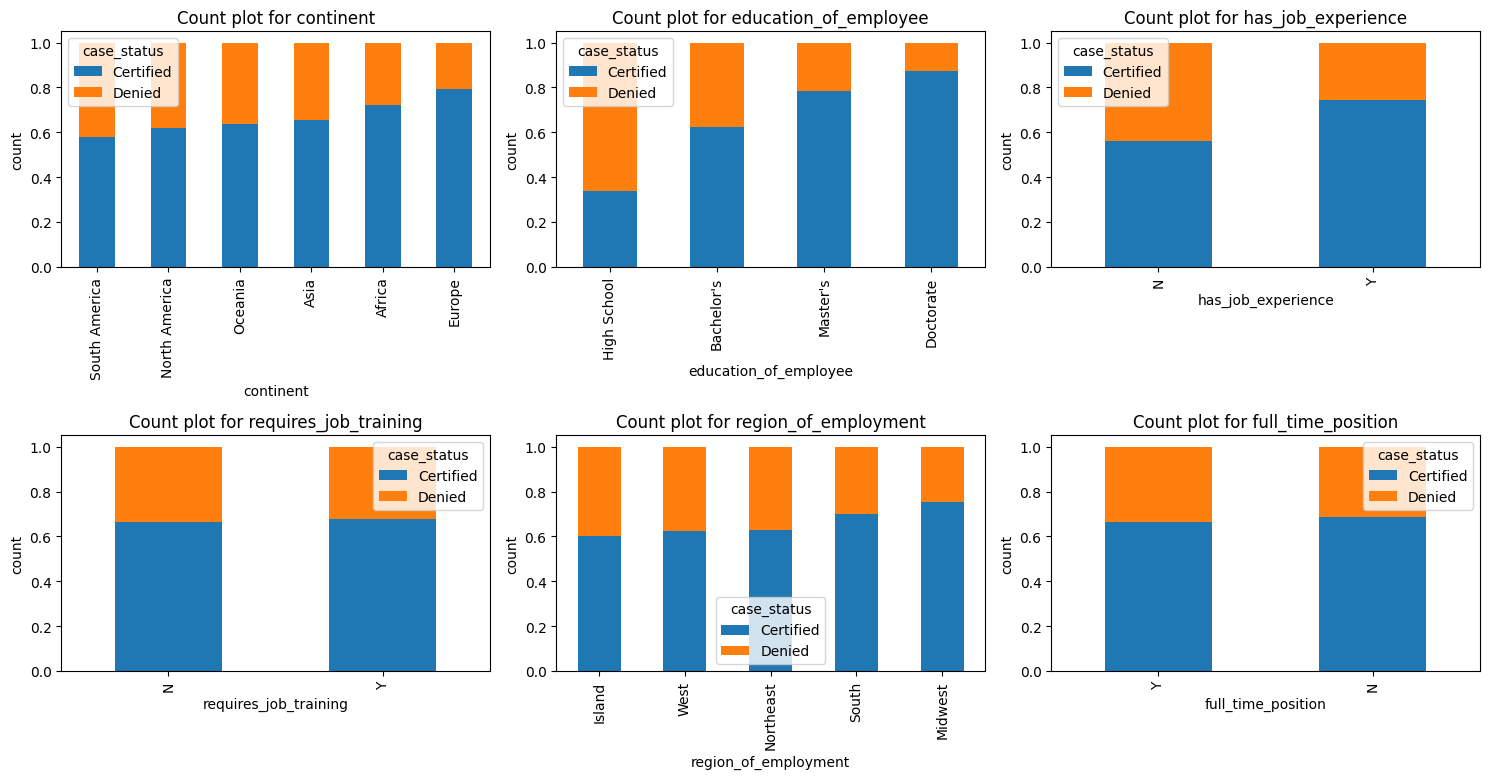

In [51]:
ObjEDA.plot_crosstab()

### HeatMap Observation
* who has job experiece was strongly co related

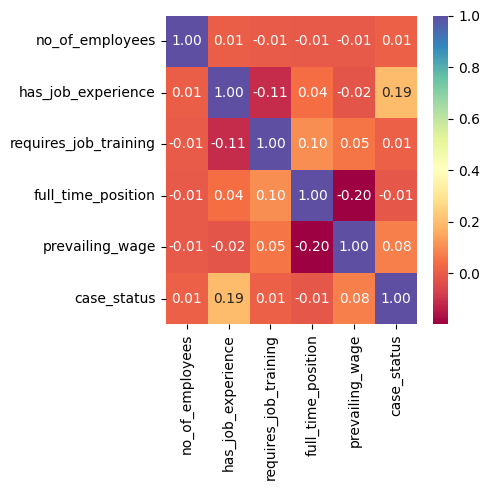

In [52]:
ObjEDA.plot_Heatmap()

### Count plot observation
* Asia has high number of applicants
* African, south americana dn oceania was least applicants
* MAster and Bachelor applicant were more
* Doctrate applicant were least among other qualification
* Norhtern and Souther region has more employment

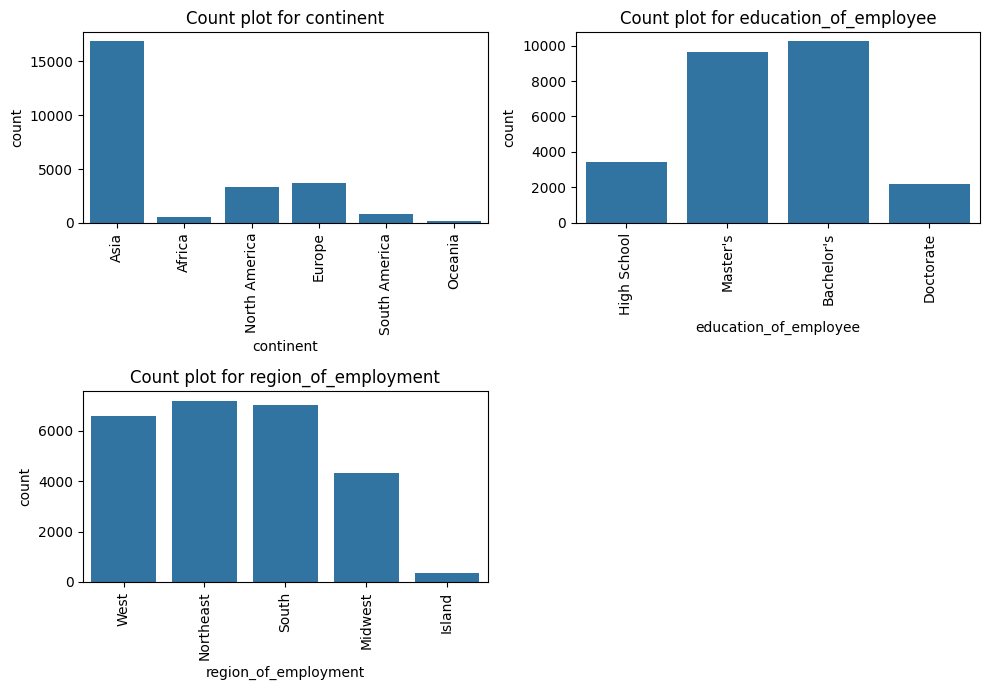

In [53]:
ObjEDA.plot_countplot()

### Wages Observtion
* 74k is average salary of the certified employee
* few Outlier observed but considering these are valid as the salary differ based on the performance and other factors of the emplyee

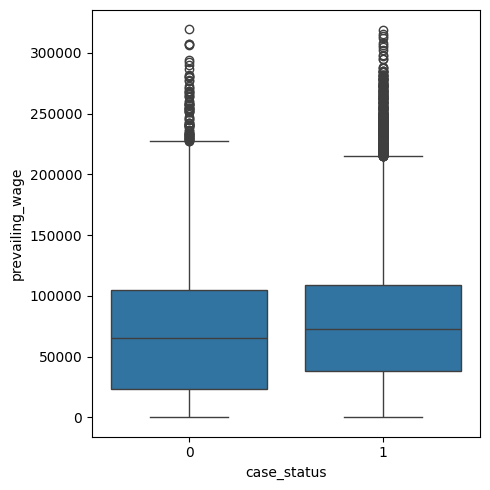

In [54]:
ObjEDA.plot_boxplot()

In [55]:
df_visa.describe()

no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000

## Preprocessing
Im not considering the outlier for my prediction as the wages as the geniune outliers

In [56]:
class preprocessing():
  def __init__(self,df):
    self.df = df

  '''
    Outlier Treatment using IQR method
    here we will be finding the 1st Quantile & 3rd Quantile
    here the outiler was handled by removing and caping as well but for my prediction i have taken the original dataset
  '''
  def OutlierTreatment(self):
    self.df = self.Feature_Engnieering()
    #finding the Quantile 1 and 3
    quartile_1 = self.df['prevailing_wage'].quantile(0.25)
    quartile_3 = self.df['prevailing_wage'].quantile(0.75)
    print(f'Quantile 01 {quartile_1} \n Quantile 03 {quartile_3}')

    # finding the iqr value
    iqr_value = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr_value
    upper_bound = quartile_3 + 1.5 * iqr_value
    print(f'Lower Bount:{lower_bound} \n Upper Bound {upper_bound}')

    #Removing the outlier
    df_outlier = self.df.copy()
    outlier = df_outlier.index[(df_outlier['prevailing_wage'] <lower_bound) | (df_outlier['prevailing_wage'] > upper_bound)]
    print('Outlier Shape',outlier.shape)
    df_outlier_removed = df_outlier[~df_outlier.index.isin(outlier)]

    # Caping the outlier
    df_capped = self.df.copy()
    df_capped['prevailing_wage'] = np.where(df_capped['prevailing_wage'] > upper_bound, upper_bound, df_capped['prevailing_wage'])
    df_capped['prevailing_wage'] = np.where(df_capped['prevailing_wage'] < lower_bound, lower_bound, df_capped['prevailing_wage'])

    print('Actual dataset no modification shape: ',self.df.shape)
    print('Outlier removed dataset shape: ', df_outlier_removed.shape)
    print('Outlier capped dataset shape: ', df_capped.shape)


    return self.df, df_capped,df_outlier_removed

  '''
  Feature engineering remplacing the categorical value into encode label value
  '''
  def Feature_Engnieering(self):
    ##Label Encoder
    self.df['case_status'] = self.df['case_status'].map({'Certified':1,'Denied':0})
    self.df['has_job_experience'] = self.df['has_job_experience'].map({'Y':1, 'N':0})
    self.df['requires_job_training'] = self.df['requires_job_training'].map({'Y':1, 'N':0})
    self.df['full_time_position'] = self.df['full_time_position'].map({'Y':1, 'N':0})

    #self.df['Year_Since_Established'] = datetime.datetime.now().year -  self.df['yr_of_estab']

    # One Hot encoding
    self.df = pd.get_dummies(self.df, columns=['continent','education_of_employee','region_of_employment','unit_of_wage'], drop_first= True,dtype=int)


    return self.df

ObjPreProc = preprocessing(df_visa)




In [57]:
df_visa, df_capped,df_outlier_removed = ObjPreProc.OutlierTreatment()
dict_Preprocessed_dataset = {'Original': df_visa, 'Outlier Capped dataset':df_capped, 'Outlier Removed dataset': df_outlier_removed}

Quantile 01 34015.479999999996 
 Quantile 03 107735.51250000001
Lower Bount:-76564.56875000002 
 Upper Bound 218315.56125000003
Outlier Shape (427,)
Actual dataset no modification shape:  (25480, 23)
Outlier removed dataset shape:  (25053, 23)
Outlier capped dataset shape:  (25480, 23)


## Metrics Calculation class

In [58]:
'''
Metrics calculation class
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion Matrix
6. Classification Report
7. ROC AUC Score
'''

class MetricCalculation():
  def CalculatingMetrices(self,target,predicted_out,model_type,dataset_type):
    accuracy = accuracy_score(target, predicted_out)
    precision = precision_score(target, predicted_out)
    recall = recall_score(target, predicted_out)
    f1 = f1_score(target, predicted_out)
    conf_matrix = confusion_matrix(target, predicted_out)
    class_report = classification_report(target, predicted_out)

    print('-'*100)
    print(f'Accuracy {accuracy} \n Precision {precision} \n Recall {recall} \n F1_Score {f1}')
    print('-'*100)
    print('Classification Report: ', class_report)
    print('-'*100)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(target, predicted_out)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    df_Metrics = pd.DataFrame({'Type':[model_type], 'DatasetType':[dataset_type],'Accuracy':[accuracy], 'Precision': [precision], 'Recall':[recall], 'F1-Score':[f1], 'ROC_AUC':[roc_auc]})
    totalsamples = np.sum(conf_matrix)
    confusion_label = np.asarray([["{0:0.0f}".format(item)+"\n{0:.2%}".format(item/conf_matrix.flatten().sum())]
                                for item in conf_matrix.flatten()]).reshape(2,2)

    plt.figure(figsize=(4,4))
    sns.heatmap(conf_matrix,annot=confusion_label,cmap='Spectral',fmt='')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_type}')
    plt.xticks([0,1],labels=['Predicted Certified','Predicted Denied'],rotation=90)
    plt.yticks([0,1],labels=['Actual Certified','Actual Denied'], rotation=360)
    plt.tight_layout()

    plt.show()

    plt.figure(figsize=(5,5))
    plt.plot(false_positive_rate, true_positive_rate, label =f'ROC Curve (Auc = {roc_auc:.2f})')
    plt.plot([0,1],[0,1], color ='green',lw=2, linestyle='--')
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC CURVE for {model_type}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    return df_Metrics


## Data Split Class

In [59]:
'''
Split the dataset into train and test dataset
Scalar transormation
SMOTE - Over sample minority class
Under Sample the dataset
'''

class DataSetSplitTransform():
  '''
    Constructor intialize and declare the train and test dataframe
  '''
  def __init__(self,df):
    self.df = df
    self.Features = self.df.drop(['case_status','case_id'], axis=1)
    self.Target = self.df['case_status']
    self.df_Metrics_train = pd.DataFrame()
    self.df_Metrics_Test = pd.DataFrame()


  def Dataset_Split_Transform(self):
    '''
    Function to split the dataset into train and test dataset
    Fixing the test size to 20%
    Startify on the Target dataset which means the balancing the target dataset equally across the train and test
    random state seeding 42
    '''
    Feature_Train, Feature_Test, Target_Train, Target_Test = train_test_split(self.Features, self.Target, test_size=0.2, stratify = self.Target, random_state = 42)
    print('-'*100)
    print(f'Feature Train Shape: {Feature_Train.shape}')
    print(f'Feature Test Shape: {Feature_Test.shape}')
    print(f'Target Train Shape: {Target_Train.shape}')
    print(f'Target Test Shape: {Target_Test.shape}')
    print('-'*100)

    '''
      Scalr transform- transforming the individual feature to standarized scale Z-score normalization
      Formula z= feature_value - mean of the feature/standard deviation
    '''
    #SCALAR TRANSFORMATION
    scaler_Obj = StandardScaler()
    Feature_Train_Scaled = scaler_Obj.fit_transform(Feature_Train)
    Feature_Test_Scaled = scaler_Obj.transform(Feature_Test)
    print(f'Feature train scaled shape: {Feature_Train_Scaled.shape}')
    print(f'Feature test scaled shape: {Feature_Test_Scaled.shape}')
    print('-'*100)

    '''
      SMOTE - Synthetic Minority Over-Sampling Technique to handle the imbalance in dataset by generting the syntetic data samples
    '''
    ##SMOTE TRANSFORM
    smote_trans = SMOTE(random_state = 42)
    Feature_Train_Resample, Target_Train_Resample = smote_trans.fit_resample(Feature_Train_Scaled, Target_Train)
    print(f'Feature Train SMOTE Resampled Shape {Feature_Train_Resample.shape}')
    print(f'Target Train SMOTE Resampled shape {Target_Train_Resample.shape}')


    '''
      Random under sample - to address the class imbalance in datasets by reducing the number of instances in the majority class to match with the minority class
    '''
    ## UNDER SAMPLE TRANSFORMATION
    undersample_trans = RandomUnderSampler(random_state = 42)
    Feature_Train_UnderSample, Target_Train_UnderSample = undersample_trans.fit_resample(Feature_Train_Scaled, Target_Train)
    print(f'Feature Train Under Sample Shape {Feature_Train_UnderSample.shape}')
    print(f'Target Train Under sample shape {Target_Train_UnderSample.shape}')
    print('-'*100)

    dictionary_dataset ={ 'Feature_Train' : Feature_Train, 'Feature_Test': Feature_Test,'Target_Train': Target_Train, 'Target_Test': Target_Test,
                          'Feature_Train_Scaled': Feature_Train_Scaled, 'Feature_Test_Scaled': Feature_Test_Scaled,
                          'Feature_Train_Resample':Feature_Train_Resample,
                          'Target_Train_Resample': Target_Train_Resample,
                          'Feature_Train_UnderSample' : Feature_Train_UnderSample,
                          'Target_Train_UnderSample': Target_Train_UnderSample
                        }




    return dictionary_dataset

Objsplittransform = DataSetSplitTransform(df_visa)
dict_Transformed_dataset= Objsplittransform.Dataset_Split_Transform()

----------------------------------------------------------------------------------------------------
Feature Train Shape: (20384, 21)
Feature Test Shape: (5096, 21)
Target Train Shape: (20384,)
Target Test Shape: (5096,)
----------------------------------------------------------------------------------------------------
Feature train scaled shape: (20384, 21)
Feature test scaled shape: (5096, 21)
----------------------------------------------------------------------------------------------------
Feature Train SMOTE Resampled Shape (27228, 21)
Target Train SMOTE Resampled shape (27228,)
Feature Train Under Sample Shape (13540, 21)
Target Train Under sample shape (13540,)
----------------------------------------------------------------------------------------------------


## Ensemble Bagging

In [121]:
'''
Executing the Ensemble Baggin models
1. Without hyper tuning
      Decision Tree, Random Forest and Bagging classifier
2. With RandomizedSearchCV Hyper tuning model
      Decision Tree, Random Forest and Bagging classifier

'''

class Ensemble_Bagging_Model(MetricCalculation):
  def __init__(self):
    super().__init__()
    self.df_Metrics_Test = pd.DataFrame()
    self.df_Metrics_Train = pd.DataFrame()

  def ModelExecution(self,feature_train, feature_test, target_train, target_test,DatasetType,Algorthm):
    ## Base Decision tree without hypertuning the paramter
    DTreeClF = DecisionTreeClassifier(random_state = 42)
    ## Random Forest classifier without hyper parameter tuned
    RndmFrstClf = RandomForestClassifier(n_estimators= 100, n_jobs=-1, verbose = 2, random_state = 42)
    ## Bagging classifier without the hyper tuned model
    BagClf = BaggingClassifier(estimator = DTreeClF, n_estimators = 100, n_jobs=-1, verbose = 2, random_state = 42, oob_score = True)

    if Algorthm =='DT':
      dict_models = {'DecisionTreeClassifier':DTreeClF}
    elif Algorthm =='RF':
      dict_models = {'RandomForestClassifier':RndmFrstClf}
    elif Algorthm =='Bag':
      dict_models = {'BaggingClassifier': BagClf}
    else:
      dict_models = {'Decision Tree Classifier': DTreeClF, 'RandomForestClassifier':RndmFrstClf, 'Bagging Classifier':BagClf}


    self.df_Metrics_Test = pd.DataFrame()
    self.df_Metrics_Train = pd.DataFrame()

    for mdl_name, execute_Model in dict_models.items():
      print('-'*200)
      print(f'Executing the Model Name: {mdl_name}')
      execute_Model.fit(feature_train, target_train)

      ## Prediction test dataset
      prediction_proba_Test = execute_Model.predict_proba(feature_test)[:,1]
      predicted_output_Test = (prediction_proba_Test > 0.5).astype(int)
      Metrics_Test = self.CalculatingMetrices(target_test,predicted_output_Test,mdl_name+'_'+DatasetType,'Test')
      self.df_Metrics_Test = pd.concat([self.df_Metrics_Test,Metrics_Test],axis=0,ignore_index=True)

      ## prediction Traind dataset
      prediction_proba_Train = execute_Model.predict_proba(feature_train)[:,1]
      predicted_output_Train = (prediction_proba_Train > 0.5).astype(int)
      Metrics_Train = self.CalculatingMetrices(target_train,predicted_output_Train,mdl_name+'_'+DatasetType,'Train')
      self.df_Metrics_Train = pd.concat([self.df_Metrics_Train,Metrics_Train],axis =0,ignore_index=True)
      print('-'*200)

    return self.df_Metrics_Test, self.df_Metrics_Train


  def GridSearchCV_HyperTune(self, feature_train, feature_test, target_train, target_test, typeofmodel):
    param_grid_decTre = {'criterion':['gini','entropy'], 'max_depth':[None,10,20,30], 'min_samples_split':[10,20,30,40], 'min_samples_leaf':[5,10,15,20],
                         'max_features':[None,'sqrt','log2'], 'max_leaf_nodes':[None, 5,10,15,20] }

    param_grid_Bagg = {'n_estimators': [50,100,150], 'estimator__criterion':['gini','entropy'], 'estimator__max_depth':[None,10,20,30],
                       'estimator__min_samples_split':[2,5,10,15] }

    param_grid_RndFrst = { 'n_estimators':[50,100,150], 'max_depth':[None, 10, 20,30], 'max_features':[None, 'sqrt', 'log2'],'criterion':['gini','entropy'],
                          'min_samples_split':[2, 5, 10, 15], 'min_samples_leaf':[1, 2, 4, 6, 8]}

    DTreeClF = DecisionTreeClassifier(random_state = 42)
    RndmFrstClf = RandomForestClassifier(n_estimators= 100, n_jobs=-1, verbose = 1, random_state = 42)
    BagClf = BaggingClassifier(estimator = DTreeClF, n_estimators = 100, n_jobs=-1, verbose = 1, random_state = 42, oob_score = True)

    DTree_GridSearch = GridSearchCV(estimator=DTreeClF, param_grid = param_grid_decTre, cv=3, n_jobs=-1, verbose = 1)
    Bagging_GridSearch = GridSearchCV(estimator = BagClf, param_grid = param_grid_Bagg, cv=3, n_jobs =-1, verbose = 1)
    RandmFrst_GridSearch = GridSearchCV(estimator = RndmFrstClf, param_grid = param_grid_RndFrst, cv=3, n_jobs=-1, verbose = 1)

    dict_models = {'DecisionTreeClassifier_GridSearchCV':DTree_GridSearch, 'BaggingClassifier_GridSearchCV': Bagging_GridSearch,
                   'RandomForestClassifier_GridSearchCV':RandmFrst_GridSearch}

    self.df_Metrics_Test = pd.DataFrame()
    self.df_Metrics_Train = pd.DataFrame()
    for model_name, model_execute in dict_models.items():
      print('-'*200)
      print(f'Executing the Hyper tuned model for the model: {model_name}')
      model_execute.fit(feature_train,target_train)
      best_parameter = model_execute.best_params_
      best_score = model_execute.best_score_
      best_estimator = model_execute.best_estimator_
      tuned_CVResult = model_execute.cv_results_

      print('-'*100)
      print(model_name)
      print(f'Model best estimator: {best_estimator}')
      print(f'Model best Parameter: {best_parameter}')
      print(f'Important Features: {best_estimator.feature_importances_}')

      prediction_proba_Test = best_estimator.predict_proba(feature_test)[:,1]
      predicted_output_Test = (prediction_proba_Test > 0.5).astype(int)
      Metrics_Test = self.CalculatingMetrices(target_test,predicted_output_Test,model_name+'_'+typeofmodel,'Test')
      self.df_Metrics_Test = pd.concat([self.df_Metrics_Test,Metrics_Test],axis=0,ignore_index=True)

      prediction_proba_Train = best_estimator.predict_proba(feature_train)[:,1]
      predicted_output_Train = (prediction_proba_Train > 0.5).astype(int)
      Metrics_Train = self.CalculatingMetrices(target_train,predicted_output_Train,model_name+'_'+typeofmodel,'Train')
      self.df_Metrics_Train = pd.concat([self.df_Metrics_Train,Metrics_Train],axis =0,ignore_index=True)

    return self.df_Metrics_Test, self.df_Metrics_Train


  def RandomSearchCV_HyperTune(self, feature_train, feature_test, target_train, target_test, typeofmodel):

    ## Hyerparameter Decision Tree
    param_rndm_decTre = {'criterion':['gini','entropy'], 'max_depth':[None,10,20,30], 'min_samples_split':[10,20,30,40], 'min_samples_leaf':[5,10,15,20],
                         'max_features':[None,'sqrt','log2'], 'max_leaf_nodes':[None, 5,10,15,20] }

    ## Hyperparameter Bagging classifier
    param_rndm_Bagg = {'n_estimators': [50,100,150], 'estimator__criterion':['gini','entropy'], 'estimator__max_depth':[None,10,20,30],
                       'estimator__min_samples_split':[2,5,10,15] }

    ## Hyperparameter Random Forest classifier
    param_rndm_RndFrst = { 'n_estimators':[50,100,150], 'max_depth':[None, 10, 20,30], 'max_features':[None, 'sqrt', 'log2'],'criterion':['gini','entropy'],
                          'min_samples_split':[2, 5, 10, 15], 'min_samples_leaf':[1, 2, 4, 6, 8]}

    DTreeClF = DecisionTreeClassifier(random_state = 42)
    RndmFrstClf = RandomForestClassifier(n_estimators= 100, n_jobs=-1, verbose = 1, random_state = 42)
    BagClf = BaggingClassifier(estimator = DTreeClF, n_estimators = 100, n_jobs=-1, verbose = 1, random_state = 42, oob_score = True)

    DTree_RandomSearch = RandomizedSearchCV(estimator=DTreeClF, param_distributions = param_rndm_decTre, cv=3, n_jobs=-1, verbose = 1, n_iter=20)
    Bagging_RandomSearch = RandomizedSearchCV(estimator = BagClf, param_distributions = param_rndm_Bagg, cv=3, n_jobs =-1, verbose = 1, n_iter=20)
    RandmFrst_RandomSearch = RandomizedSearchCV(estimator = RndmFrstClf, param_distributions = param_rndm_RndFrst, cv=3, n_jobs=-1, verbose = 1, n_iter=20)

    dict_models = {'DTree-RdmsrchCV':DTree_RandomSearch, 'Bg-RdmsrchCV': Bagging_RandomSearch,
                   'RF-RdmnsrchCV':RandmFrst_RandomSearch}

    self.df_Metrics_Test = pd.DataFrame()
    self.df_Metrics_Train = pd.DataFrame()
    result_model = {}
    for model_name, model_execute in dict_models.items():
      print('-'*200)
      print(f'Hyper parameter Tuning using Randomized search CV for the algorithm:{model_name}')
      model_execute.fit(feature_train,target_train)
      best_parameter = model_execute.best_params_
      best_score = model_execute.best_score_
      best_estimator = model_execute.best_estimator_
      tuned_CVResult = model_execute.cv_results_

      #print('Important Features: ',best_estimator.feature_importances_)

      print('-'*100)
      print(model_name)
      print(f'Model estimator: {best_estimator}')
      print(f'Model Parameter: {best_parameter}')
      result_model[model_name+'_'+'Best Estimator']= best_estimator
      result_model[model_name+'_'+'Best Parameter'] = best_parameter
      result_model[model_name+'_'+'Best Score']= best_score

      ## Prediction Test
      prediction_proba_Test = best_estimator.predict_proba(feature_test)[:,1]
      predicted_output_Test = (prediction_proba_Test > 0.5).astype(int)
      Metrics_Test = self.CalculatingMetrices(target_test,predicted_output_Test,model_name+'_'+typeofmodel,'Test')
      self.df_Metrics_Test = pd.concat([self.df_Metrics_Test,Metrics_Test],axis=0,ignore_index=True)

      ## Prediction Train
      prediction_proba_Train = best_estimator.predict_proba(feature_train)[:,1]
      predicted_output_Train = (prediction_proba_Train > 0.5).astype(int)
      Metrics_Train = self.CalculatingMetrices(target_train,predicted_output_Train,model_name+'_'+typeofmodel,'Train')
      self.df_Metrics_Train = pd.concat([self.df_Metrics_Train,Metrics_Train],axis =0,ignore_index=True)
      print('-'*200)
    return result_model,self.df_Metrics_Test, self.df_Metrics_Train












## Object Creation
ObjectBagging = Ensemble_Bagging_Model()

In [61]:
overall_Train_Metrics = pd.DataFrame()
overall_Test_Metrics = pd.DataFrame()

# ENSEMBLE - BAGGING

## DECISION TREE, RANDOM FOREST & BAGGING CLASSIFIER - ORIGINAL DATASET

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: Decision Tree Classifier
----------------------------------------------------------------------------------------------------
Accuracy 0.652668759811617 
 Precision 0.7418590882178804 
 Recall 0.736192714453584 
 F1_Score 0.7390150398112652
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.48      0.48      0.48      1692
           1       0.74      0.74      0.74      3404

    accuracy                           0.65      5096
   macro avg       0.61      0.61      0.61      5096
weighted avg       0.65      0.65      0.65      5096

--------------------------------------------------------------------------------

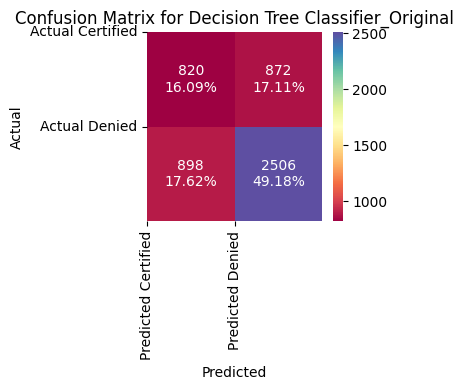

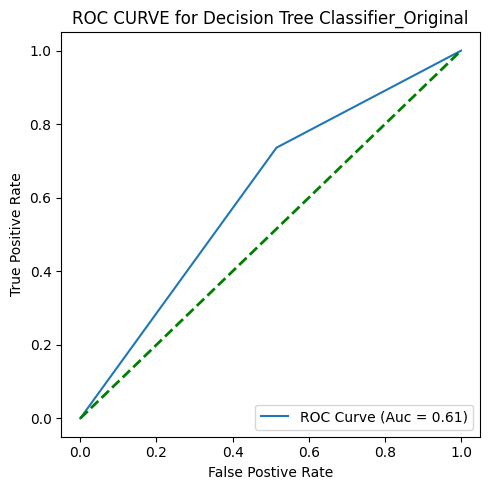

----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6770
           1       1.00      1.00      1.00     13614

    accuracy                           1.00     20384
   macro avg       1.00      1.00      1.00     20384
weighted avg       1.00      1.00      1.00     20384

----------------------------------------------------------------------------------------------------


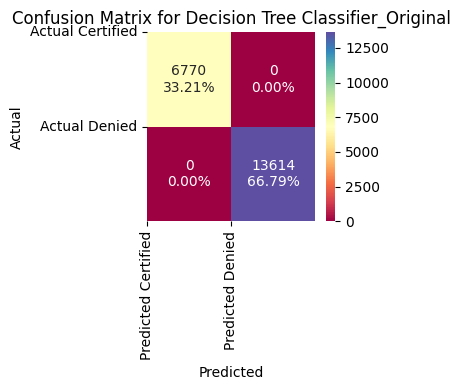

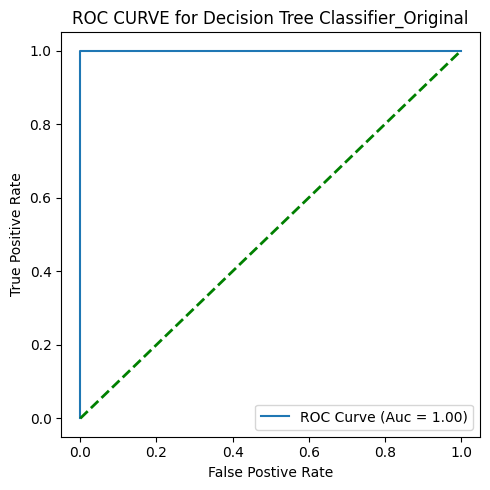

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: RandomForestClassifier
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100building tree 46 of 100

building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.7213500784929356 
 Precision 0.7672413793103449 
 Recall 0.836662749706228 
 F1_Score 0.8004496908375491
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.60      0.49      0.54      1692
           1       0.77      0.84      0.80      3404

    accuracy                           0.72      5096
   macro avg       0.68      0.66      0.67      5096
weighted avg       0.71      0.72      0.71      5096

----------------------------------------------------------------------------------------------------


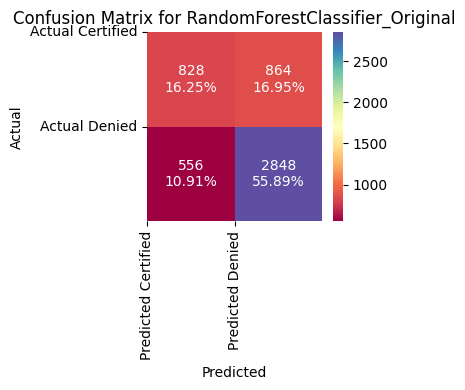

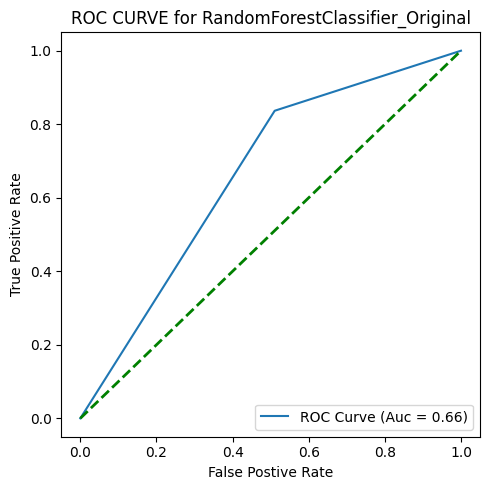

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.9999509419152276 
 Precision 0.9999265515975028 
 Recall 1.0 
 F1_Score 0.9999632744500349
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6770
           1       1.00      1.00      1.00     13614

    accuracy                           1.00     20384
   macro avg       1.00      1.00      1.00     20384
weighted avg       1.00      1.00      1.00     20384

----------------------------------------------------------------------------------------------------


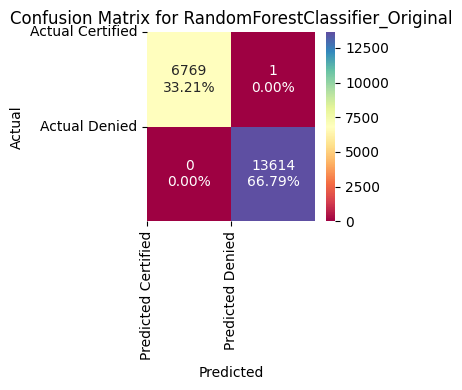

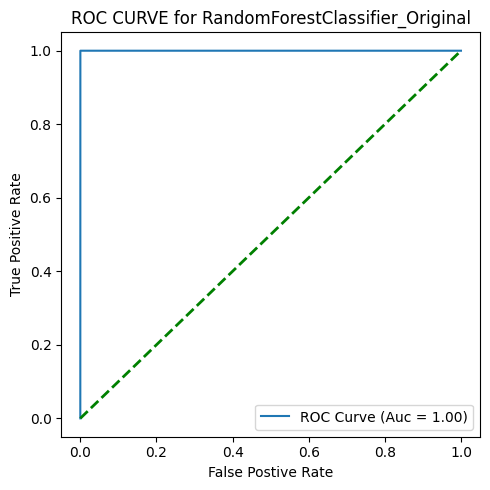

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: Bagging Classifier


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   13.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.716640502354788 
 Precision 0.7652950730914997 
 Recall 0.8304935370152762 
 F1_Score 0.7965624119470274
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.59      0.49      0.53      1692
           1       0.77      0.83      0.80      3404

    accuracy                           0.72      5096
   macro avg       0.68      0.66      0.66      5096
weighted avg       0.71      0.72      0.71      5096

----------------------------------------------------------------------------------------------------


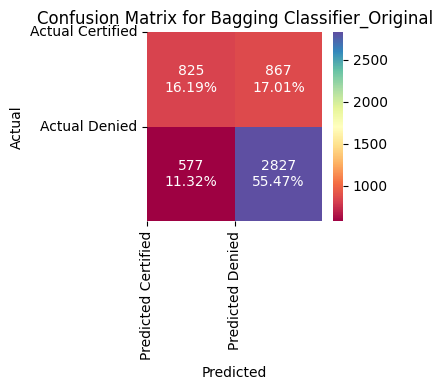

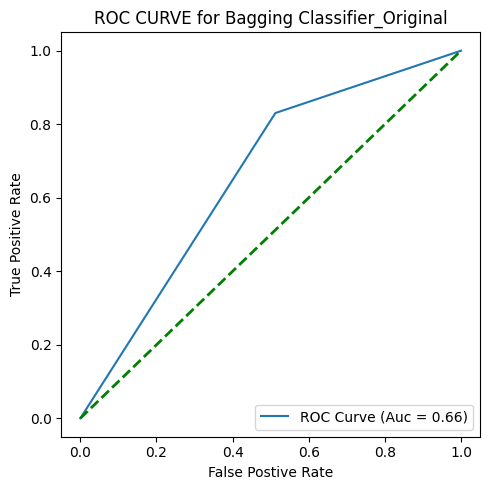

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.0s finished


----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6770
           1       1.00      1.00      1.00     13614

    accuracy                           1.00     20384
   macro avg       1.00      1.00      1.00     20384
weighted avg       1.00      1.00      1.00     20384

----------------------------------------------------------------------------------------------------


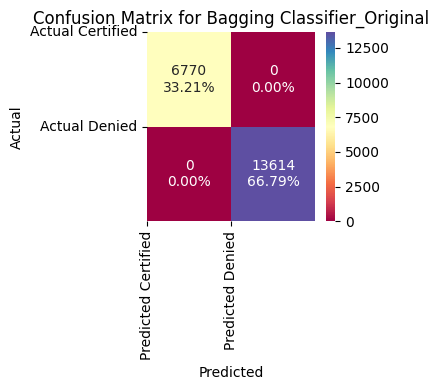

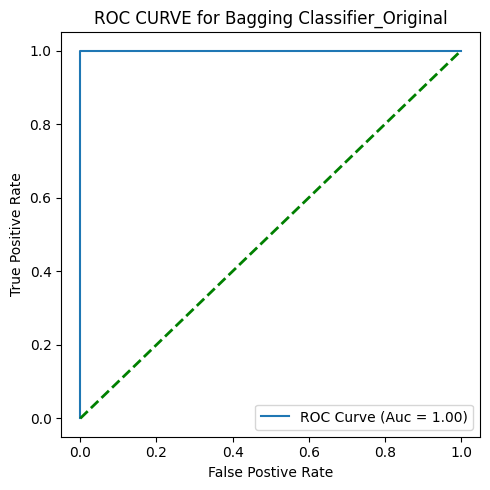

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [62]:
df_Test_DT_OG, df_Train_DT_OG = ObjectBagging.ModelExecution(dict_Transformed_dataset['Feature_Train'],dict_Transformed_dataset['Feature_Test'],
                                                 dict_Transformed_dataset['Target_Train'],dict_Transformed_dataset['Target_Test'],'Original','')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_DT_OG], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_DT_OG], axis = 0, ignore_index = True)

In [63]:
df_Test_DT_OG

Type DatasetType  Accuracy  Precision  \
0  Decision Tree Classifier_Original        Test  0.652669   0.741859   
1    RandomForestClassifier_Original        Test  0.721350   0.767241   
2        Bagging Classifier_Original        Test  0.716641   0.765295   

     Recall  F1-Score   ROC_AUC  
0  0.736193  0.739015  0.610413  
1  0.836663  0.800450  0.663012  
2  0.830494  0.796562  0.659041

In [64]:
df_Train_DT_OG

Type DatasetType  Accuracy  Precision  Recall  \
0  Decision Tree Classifier_Original       Train  1.000000   1.000000     1.0   
1    RandomForestClassifier_Original       Train  0.999951   0.999927     1.0   
2        Bagging Classifier_Original       Train  1.000000   1.000000     1.0   

   F1-Score   ROC_AUC  
0  1.000000  1.000000  
1  0.999963  0.999926  
2  1.000000  1.000000

Observation: DecisionTree, RandomForest & Bagging Classifier - Original Dataset
* for the original dataset the prediction was over fit between Train and test data
* Random Forest recall is 0.836 which shows the better peromance capturing the positive response also the ROC AUC 66% which denotes the Random forest is best model for this datset
* Bagging Classifier perfromance was closer to the Random forest where Reacll is 0.830 and ROC AUC score is 65%
* Bagging and Random Forest has ROC AUC score showing better generalization for new unseen data
* Decision Tree shown the poort over fit performance for the original dataset

## DECISION TREE, RANDOM FOREST & BAGGING CLASSIFIER - SMOTE OVERSAMPLE DATASET

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: Decision Tree Classifier
----------------------------------------------------------------------------------------------------
Accuracy 0.646193092621664 
 Precision 0.7530825165981663 
 Recall 0.699764982373678 
 F1_Score 0.7254454088624943
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.47      0.54      0.50      1692
           1       0.75      0.70      0.73      3404

    accuracy                           0.65      5096
   macro avg       0.61      0.62      0.61      5096
weighted avg       0.66      0.65      0.65      5096

--------------------------------------------------------------------------------

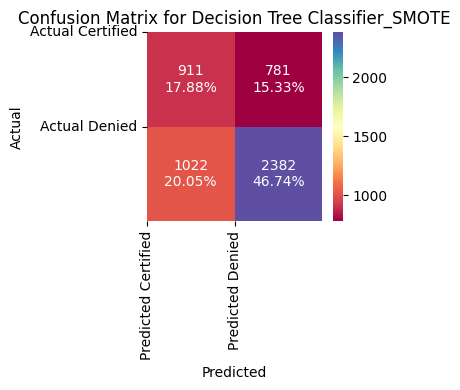

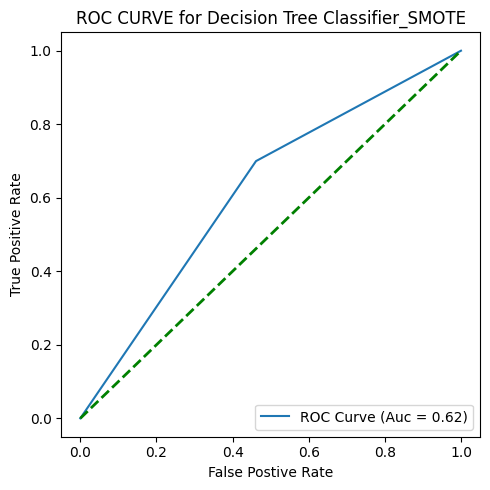

----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13614
           1       1.00      1.00      1.00     13614

    accuracy                           1.00     27228
   macro avg       1.00      1.00      1.00     27228
weighted avg       1.00      1.00      1.00     27228

----------------------------------------------------------------------------------------------------


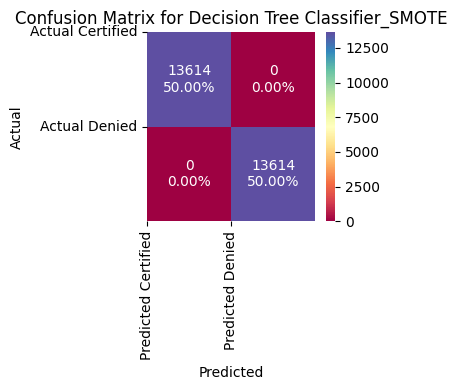

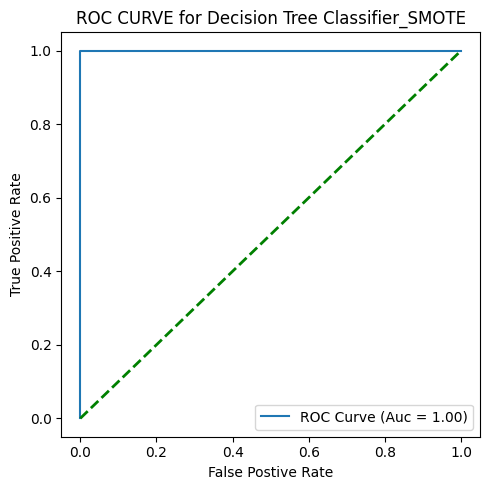

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: RandomForestClassifier
building tree 1 of 100building tree 2 of 100



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.6981946624803768 
 Precision 0.7869003690036901 
 Recall 0.7517626321974148 
 F1_Score 0.7689302884615384
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.54      0.59      0.57      1692
           1       0.79      0.75      0.77      3404

    accuracy                           0.70      5096
   macro avg       0.66      0.67      0.67      5096
weighted avg       0.71      0.70      0.70      5096

----------------------------------------------------------------------------------------------------


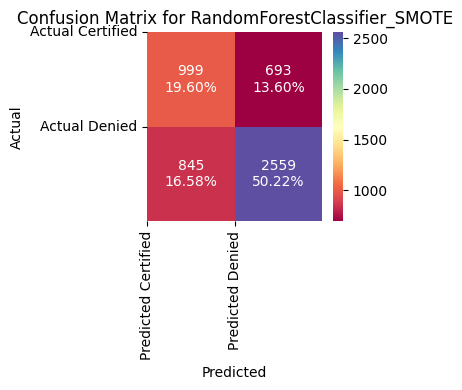

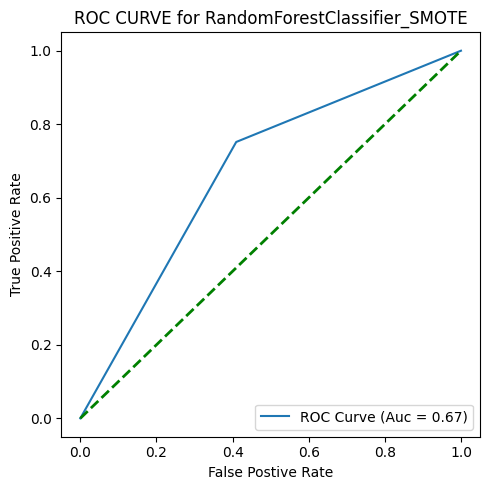

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.5s finished


----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13614
           1       1.00      1.00      1.00     13614

    accuracy                           1.00     27228
   macro avg       1.00      1.00      1.00     27228
weighted avg       1.00      1.00      1.00     27228

----------------------------------------------------------------------------------------------------


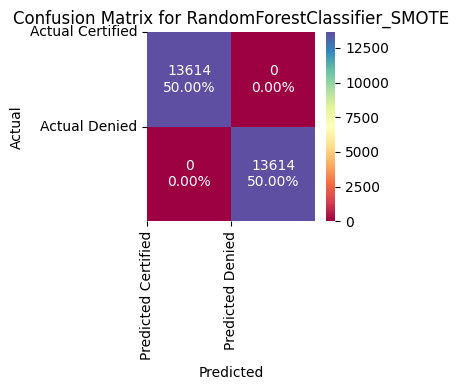

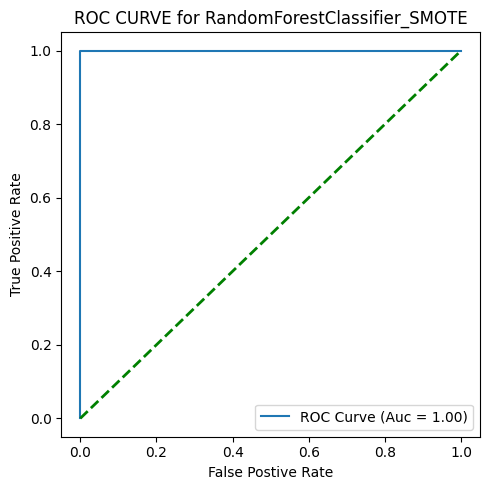

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: Bagging Classifier


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   15.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.6928963893249608 
 Precision 0.7838839147885149 
 Recall 0.7458871915393654 
 F1_Score 0.7644136685232575
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.53      0.59      0.56      1692
           1       0.78      0.75      0.76      3404

    accuracy                           0.69      5096
   macro avg       0.66      0.67      0.66      5096
weighted avg       0.70      0.69      0.70      5096

----------------------------------------------------------------------------------------------------


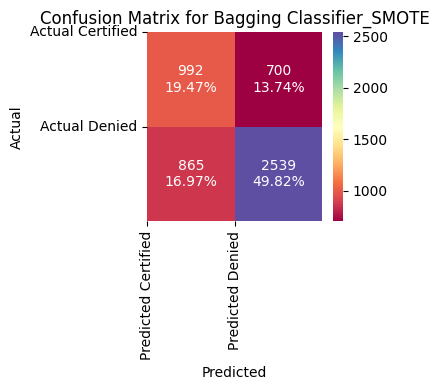

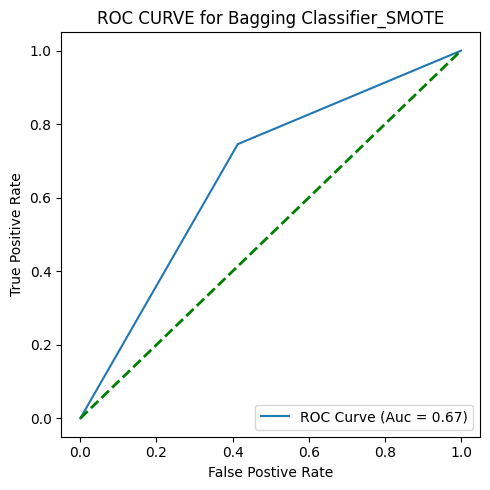

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.1s finished


----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13614
           1       1.00      1.00      1.00     13614

    accuracy                           1.00     27228
   macro avg       1.00      1.00      1.00     27228
weighted avg       1.00      1.00      1.00     27228

----------------------------------------------------------------------------------------------------


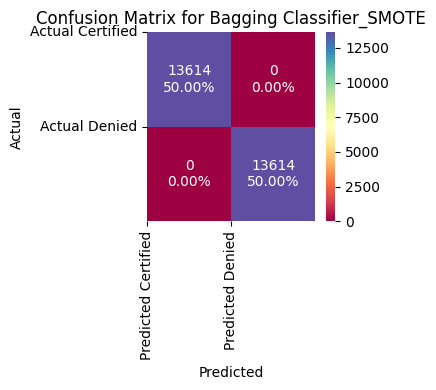

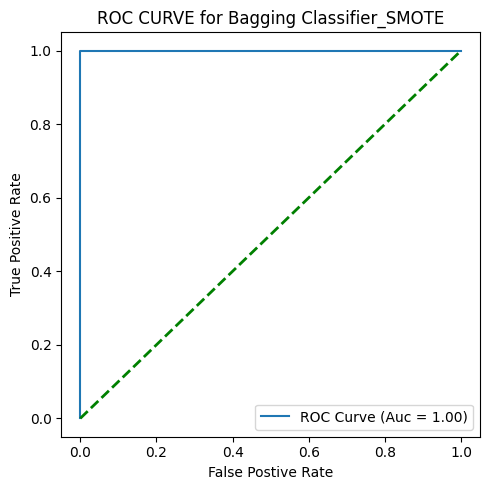

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [65]:
df_Test_smote, df_Train_smote = ObjectBagging.ModelExecution(dict_Transformed_dataset['Feature_Train_Resample'],dict_Transformed_dataset['Feature_Test_Scaled'],
                                                 dict_Transformed_dataset['Target_Train_Resample'],dict_Transformed_dataset['Target_Test'],'SMOTE','')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_smote], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_smote], axis = 0, ignore_index = True)

In [66]:
df_Test_smote

Type DatasetType  Accuracy  Precision    Recall  \
0  Decision Tree Classifier_SMOTE        Test  0.646193   0.753083  0.699765   
1    RandomForestClassifier_SMOTE        Test  0.698195   0.786900  0.751763   
2        Bagging Classifier_SMOTE        Test  0.692896   0.783884  0.745887   

   F1-Score   ROC_AUC  
0  0.725445  0.619091  
1  0.768930  0.671094  
2  0.764414  0.666088

In [67]:
df_Train_smote

Type DatasetType  Accuracy  Precision  Recall  \
0  Decision Tree Classifier_SMOTE       Train       1.0        1.0     1.0   
1    RandomForestClassifier_SMOTE       Train       1.0        1.0     1.0   
2        Bagging Classifier_SMOTE       Train       1.0        1.0     1.0   

   F1-Score  ROC_AUC  
0       1.0      1.0  
1       1.0      1.0  
2       1.0      1.0

Observation for SMOTE sampled Decision Tree, Random Forest and Bagging Classifier

* Over fit for all three models
* Recall for RF and Bagging classifer was closer to each other(0.75 & 0.74 respectively) - the peformance was slight less comparing to Original datset classification recall value
* RF and Bagging was 66% generalized for new dataset
* Decision Tree need further improvement
* all three models need improvement by tuning their hyper parameter

## UNDERSAMPLE - DECISION TREE, RANDOM FOREST & BAGGING CLASSIFIER

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: Decision Tree Classifier
----------------------------------------------------------------------------------------------------
Accuracy 0.614010989010989 
 Precision 0.7648359749354957 
 Recall 0.6095769682726204 
 F1_Score 0.6784371423900605
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.44      0.62      0.52      1692
           1       0.76      0.61      0.68      3404

    accuracy                           0.61      5096
   macro avg       0.60      0.62      0.60      5096
weighted avg       0.66      0.61      0.62      5096

-------------------------------------------------------------------------------

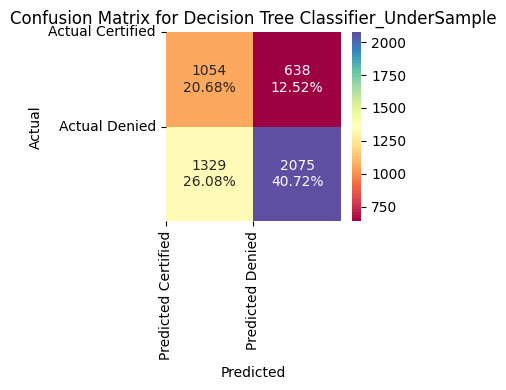

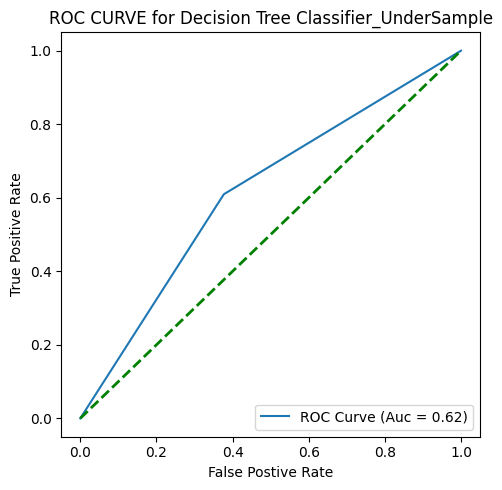

----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6770
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     13540
   macro avg       1.00      1.00      1.00     13540
weighted avg       1.00      1.00      1.00     13540

----------------------------------------------------------------------------------------------------


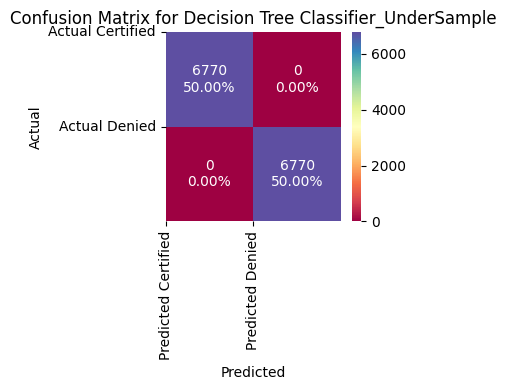

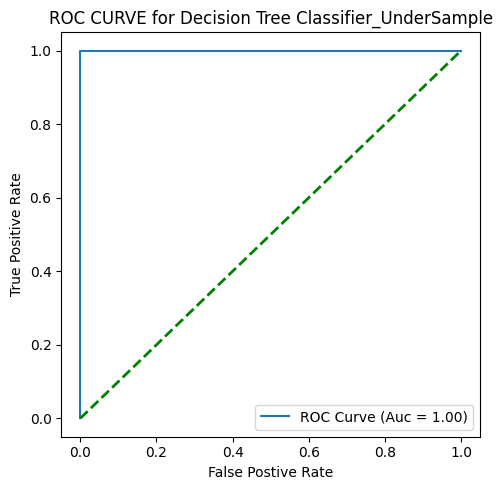

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: RandomForestClassifier
building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.7s


building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100building tree 80 of 100

building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.6775902668759811 
 Precision 0.8143520171367369 
 Recall 0.6700940070505288 
 F1_Score 0.7352135374697825
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.69      0.59      1692
           1       0.81      0.67      0.74      3404

    accuracy                           0.68      5096
   macro avg       0.66      0.68      0.66      5096
weighted avg       0.71      0.68      0.69      5096

----------------------------------------------------------------------------------------------------


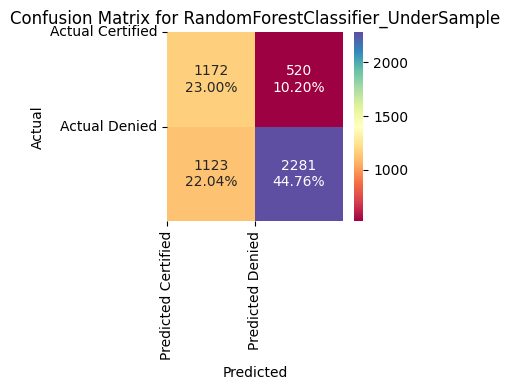

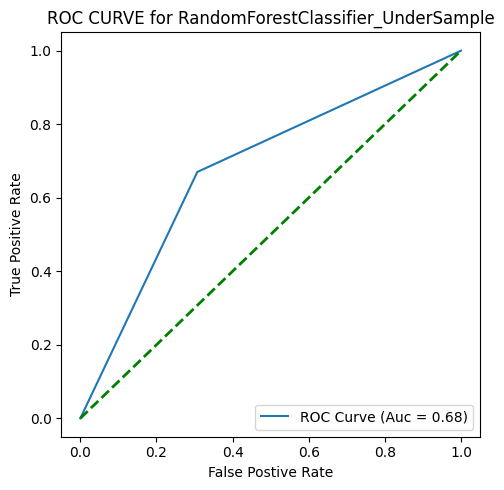

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished


----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6770
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     13540
   macro avg       1.00      1.00      1.00     13540
weighted avg       1.00      1.00      1.00     13540

----------------------------------------------------------------------------------------------------


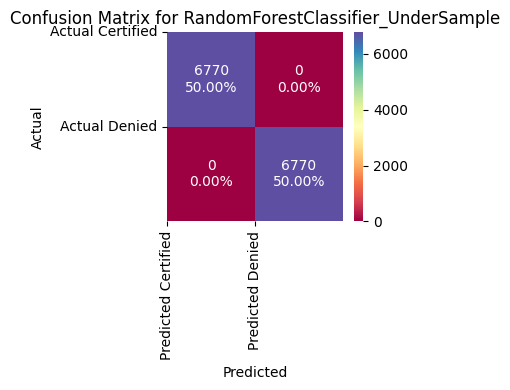

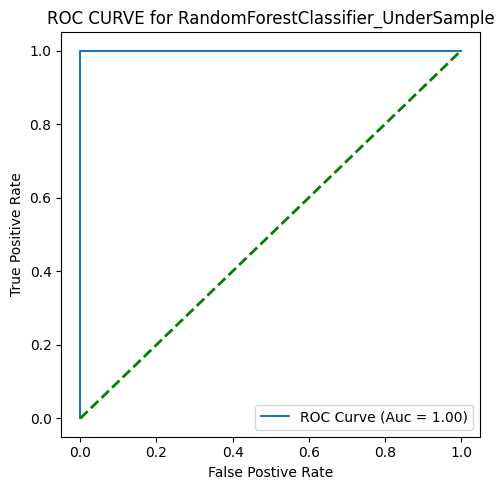

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Executing the Model Name: Bagging Classifier


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    7.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.6762166405023547 
 Precision 0.8152408339324227 
 Recall 0.6662749706227967 
 F1_Score 0.7332686711930165
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.70      0.59      1692
           1       0.82      0.67      0.73      3404

    accuracy                           0.68      5096
   macro avg       0.66      0.68      0.66      5096
weighted avg       0.71      0.68      0.69      5096

----------------------------------------------------------------------------------------------------


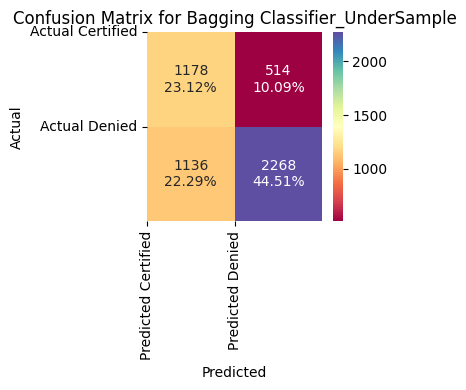

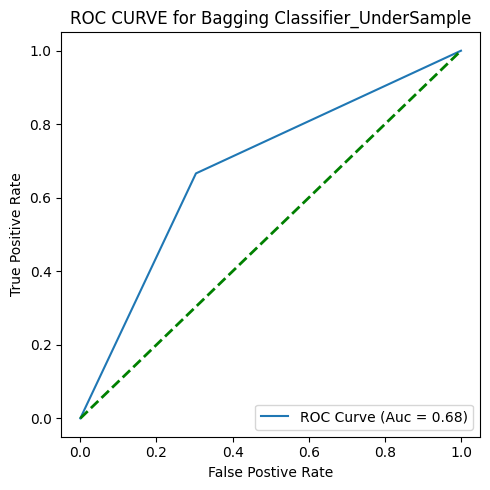

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.5s finished


----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6770
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     13540
   macro avg       1.00      1.00      1.00     13540
weighted avg       1.00      1.00      1.00     13540

----------------------------------------------------------------------------------------------------


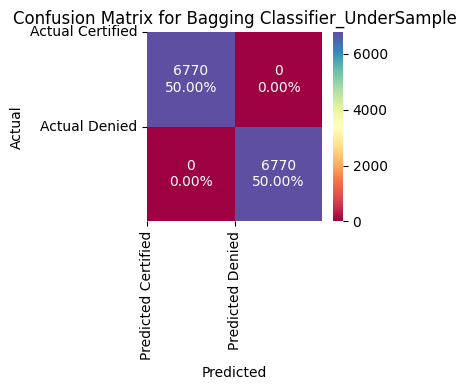

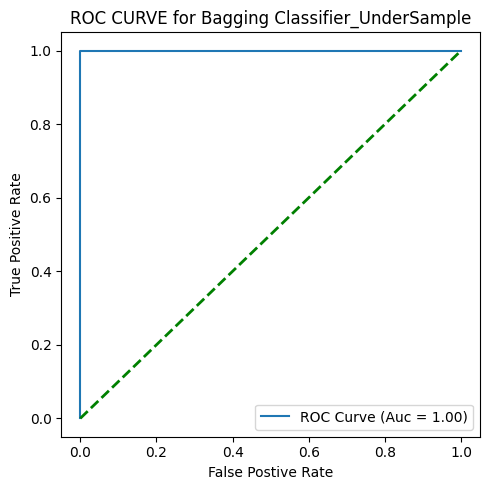

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [68]:
df_Test_undr,df_Train_undr = ObjectBagging.ModelExecution(dict_Transformed_dataset['Feature_Train_UnderSample'],dict_Transformed_dataset['Feature_Test_Scaled'],
                                                dict_Transformed_dataset['Target_Train_UnderSample'],dict_Transformed_dataset['Target_Test'],'UnderSample','')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_undr], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_undr], axis = 0, ignore_index = True)

In [69]:
df_Test_undr

Type DatasetType  Accuracy  Precision  \
0  Decision Tree Classifier_UnderSample        Test  0.614011   0.764836   
1    RandomForestClassifier_UnderSample        Test  0.677590   0.814352   
2        Bagging Classifier_UnderSample        Test  0.676217   0.815241   

     Recall  F1-Score   ROC_AUC  
0  0.609577  0.678437  0.616254  
1  0.670094  0.735214  0.681383  
2  0.666275  0.733269  0.681246

In [70]:
df_Train_undr

Type DatasetType  Accuracy  Precision  \
0  Decision Tree Classifier_UnderSample       Train       1.0        1.0   
1    RandomForestClassifier_UnderSample       Train       1.0        1.0   
2        Bagging Classifier_UnderSample       Train       1.0        1.0   

   Recall  F1-Score  ROC_AUC  
0     1.0       1.0      1.0  
1     1.0       1.0      1.0  
2     1.0       1.0      1.0

Observation Undersample : Decision Tree, Random forest & Bagging Classifier

* All three models are over fit to test sample
* Recall for RF is 0.67 & for Bagging is 0.66 which is closer to each other so the perfromance for Postive prediction is good
* ROC AUC for RF and Bagging is 68% which shows good generalization for new data sample
* Decision tree has poorfermance comparing with RF and Bagging classifier
* Hyper tuning required

## OVERAL METRICS DISPLAY BEFORE HYPERTUNING

In [71]:
overall_Test_Metrics.sort_values(by='Recall',ascending=False).reset_index(drop=True)

Type DatasetType  Accuracy  Precision  \
0       RandomForestClassifier_Original        Test  0.721350   0.767241   
1           Bagging Classifier_Original        Test  0.716641   0.765295   
2          RandomForestClassifier_SMOTE        Test  0.698195   0.786900   
3              Bagging Classifier_SMOTE        Test  0.692896   0.783884   
4     Decision Tree Classifier_Original        Test  0.652669   0.741859   
5        Decision Tree Classifier_SMOTE        Test  0.646193   0.753083   
6    RandomForestClassifier_UnderSample        Test  0.677590   0.814352   
7        Bagging Classifier_UnderSample        Test  0.676217   0.815241   
8  Decision Tree Classifier_UnderSample        Test  0.614011   0.764836   

     Recall  F1-Score   ROC_AUC  
0  0.836663  0.800450  0.663012  
1  0.830494  0.796562  0.659041  
2  0.751763  0.768930  0.671094  
3  0.745887  0.764414  0.666088  
4  0.736193  0.739015  0.610413  
5  0.699765  0.725445  0.619091  
6  0.670094  0.735214  0.681383  
7  0.666275  0.733269  0.681246  
8  0.609577  0.678437  0.616254

In [72]:
overall_Train_Metrics.sort_values(by='Recall',ascending=False).reset_index(drop=True)

Type DatasetType  Accuracy  Precision  \
0     Decision Tree Classifier_Original       Train  1.000000   1.000000   
1       RandomForestClassifier_Original       Train  0.999951   0.999927   
2           Bagging Classifier_Original       Train  1.000000   1.000000   
3        Decision Tree Classifier_SMOTE       Train  1.000000   1.000000   
4          RandomForestClassifier_SMOTE       Train  1.000000   1.000000   
5              Bagging Classifier_SMOTE       Train  1.000000   1.000000   
6  Decision Tree Classifier_UnderSample       Train  1.000000   1.000000   
7    RandomForestClassifier_UnderSample       Train  1.000000   1.000000   
8        Bagging Classifier_UnderSample       Train  1.000000   1.000000   

   Recall  F1-Score   ROC_AUC  
0     1.0  1.000000  1.000000  
1     1.0  0.999963  0.999926  
2     1.0  1.000000  1.000000  
3     1.0  1.000000  1.000000  
4     1.0  1.000000  1.000000  
5     1.0  1.000000  1.000000  
6     1.0  1.000000  1.000000  
7     1.0  1.000000  1.000000  
8     1.0  1.000000  1.000000

observation:
* Overall RandomForest and Bagging Classifier for the original dataset shown good Recall value of 0.83 comparing to other (SMOTE and Undersample Dataset)

## HYPERTUNING-RANDOMIZEDSEARCHCV - ORIGINAL DATASET DECISION TREE, RANDOM FOREST & BAGGING CLASSIFIER


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:DTree-RdmsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits
----------------------------------------------------------------------------------------------------
DTree-RdmsrchCV
Model estimator: DecisionTreeClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=10,
                       min_samples_split=20, random_state=42)
Model Parameter: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}
----------------------------------------------------------------------------------------------------
Accuracy 0.7399921507064364 
 Precision 0.7723342939481268 
 Recall 0.8660399529964747 
 F1_Score 0.8165074089461294
--------------

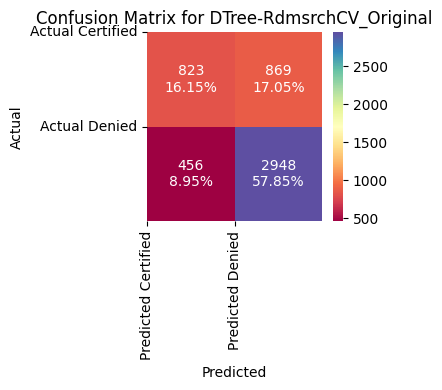

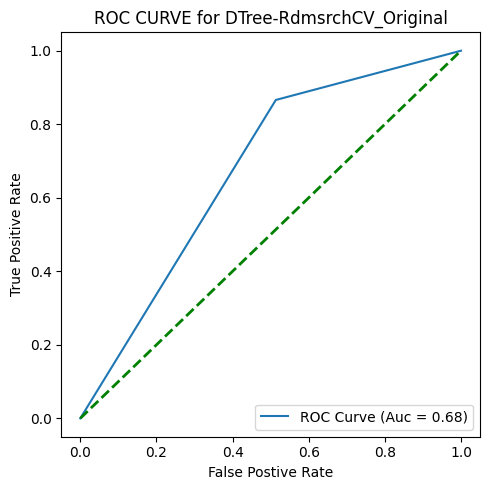

----------------------------------------------------------------------------------------------------
Accuracy 0.7502452904238619 
 Precision 0.7808977654736009 
 Recall 0.870207139709123 
 F1_Score 0.82313705054716
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.66      0.51      0.58      6770
           1       0.78      0.87      0.82     13614

    accuracy                           0.75     20384
   macro avg       0.72      0.69      0.70     20384
weighted avg       0.74      0.75      0.74     20384

----------------------------------------------------------------------------------------------------


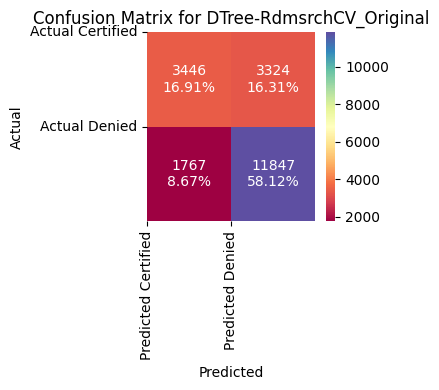

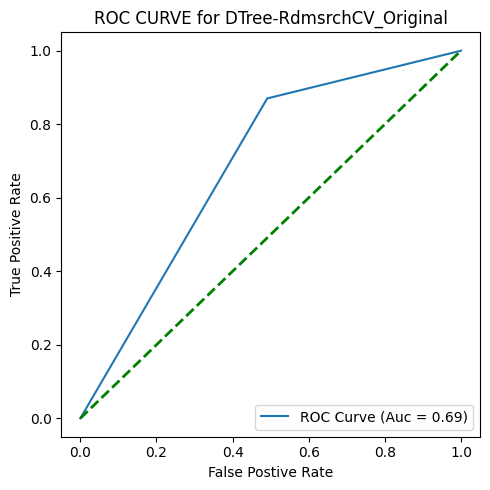

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:Bg-RdmsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.9s finished


----------------------------------------------------------------------------------------------------
Bg-RdmsrchCV
Model estimator: BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   min_samples_split=15,
                                                   random_state=42),
                  n_estimators=150, n_jobs=-1, oob_score=True, random_state=42,
                  verbose=1)
Model Parameter: {'n_estimators': 150, 'estimator__min_samples_split': 15, 'estimator__max_depth': 10, 'estimator__criterion': 'gini'}


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.7397959183673469 
 Precision 0.7755968169761274 
 Recall 0.8589894242068156 
 F1_Score 0.8151658767772512
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.64      0.50      0.56      1692
           1       0.78      0.86      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.68      0.69      5096
weighted avg       0.73      0.74      0.73      5096

----------------------------------------------------------------------------------------------------


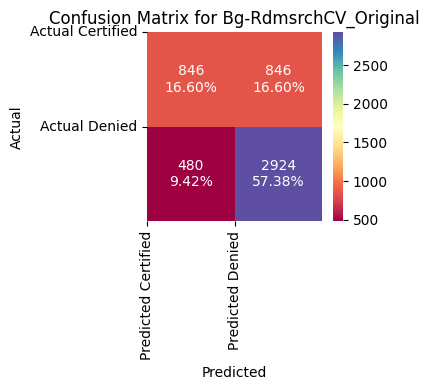

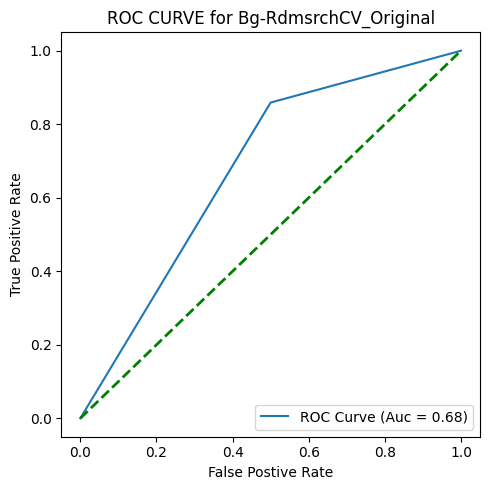

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.7718799058084772 
 Precision 0.7991190603310198 
 Recall 0.8795357719994124 
 F1_Score 0.8374012168683125
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.70      0.56      0.62      6770
           1       0.80      0.88      0.84     13614

    accuracy                           0.77     20384
   macro avg       0.75      0.72      0.73     20384
weighted avg       0.76      0.77      0.76     20384

----------------------------------------------------------------------------------------------------


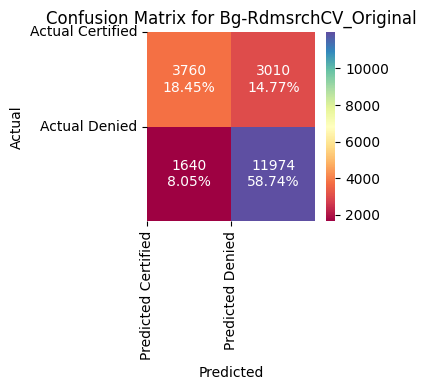

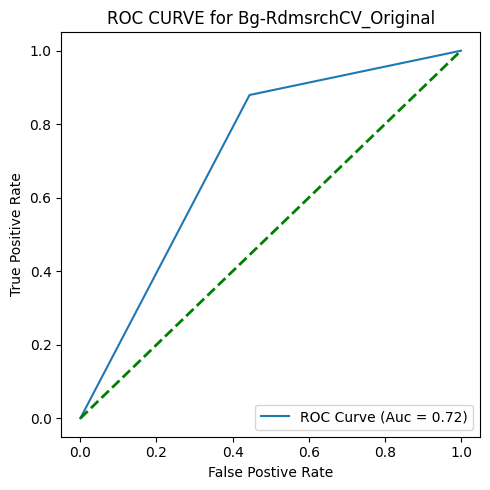

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:RF-RdmnsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.1s finished


----------------------------------------------------------------------------------------------------
RF-RdmnsrchCV
Model estimator: RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=6,
                       min_samples_split=5, n_estimators=150, n_jobs=-1,
                       random_state=42, verbose=1)
Model Parameter: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
----------------------------------------------------------------------------------------------------
Accuracy 0.7399921507064364 
 Precision 0.7693703031873542 
 Recall 0.8722091656874266 
 F1_Score 0.8175684978658956
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.65      0.47      0.55      1692
           1       0.77      0.87      0.82      3404

    accu

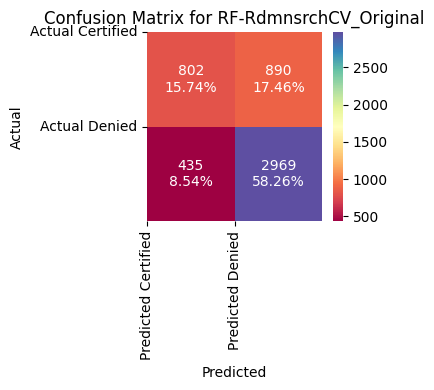

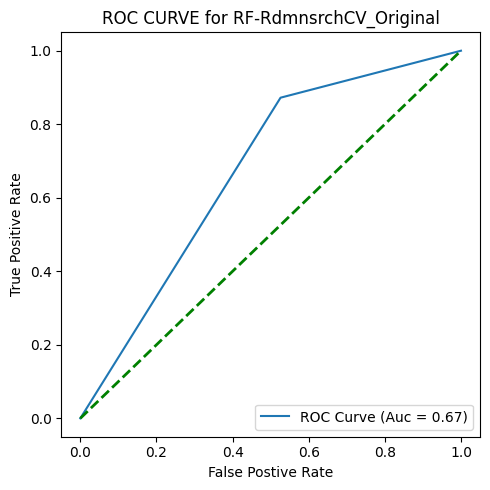

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.5s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.7868916797488226 
 Precision 0.8036158784226386 
 Recall 0.9011311884824446 
 F1_Score 0.849584487534626
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.74      0.56      0.63      6770
           1       0.80      0.90      0.85     13614

    accuracy                           0.79     20384
   macro avg       0.77      0.73      0.74     20384
weighted avg       0.78      0.79      0.78     20384

----------------------------------------------------------------------------------------------------


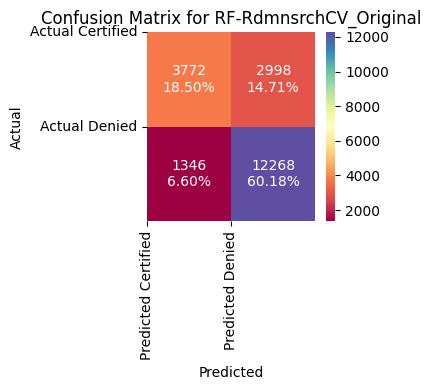

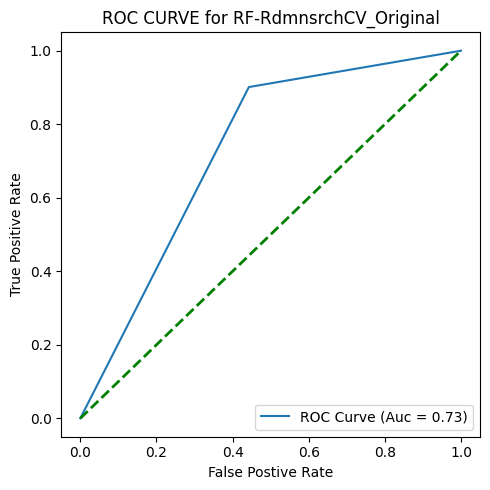

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [122]:
result_model_OG,df_Test_OG, df_Train_OG = ObjectBagging.RandomSearchCV_HyperTune(dict_Transformed_dataset['Feature_Train'],dict_Transformed_dataset['Feature_Test'],
                                                 dict_Transformed_dataset['Target_Train'],dict_Transformed_dataset['Target_Test'],'Original')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_OG], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_OG], axis = 0, ignore_index = True)

In [117]:
val_est = result_model_OG['Bg-RdmsrchCV_Best Estimator']
feature_imp = np.mean([tree.feature_importances_ for tree in val_est.estimators_],axis=0)
feature_imp

array([0.1280937 , 0.01883568, 0.09641732, 0.07230018, 0.15686807,
       0.03829517, 0.00826087, 0.047708  , 0.01052071, 0.00209567,
       0.00749581, 0.04555942, 0.1827546 , 0.05840487, 0.0393809 ,
       0.00904118, 0.02889097, 0.00956374, 0.00059782, 0.00160383,
       0.03731149])

In [74]:
result_model_OG

{'DTree-RdmsrchCV_Best Estimator': DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20,
                        min_samples_leaf=10, min_samples_split=20,
                        random_state=42),
 'DTree-RdmsrchCV_Best Parameter': {'min_samples_split': 20,
  'min_samples_leaf': 10,
  'max_leaf_nodes': 20,
  'max_features': None,
  'max_depth': 10,
  'criterion': 'entropy'},
 'DTree-RdmsrchCV_Best Score': 0.7468114278502096,
 'Bg-RdmsrchCV_Best Estimator': BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    min_samples_split=10,
                                                    random_state=42),
                   n_estimators=150, n_jobs=-1, oob_score=True, random_state=42,
                   verbose=1),
 'Bg-RdmsrchCV_Best Parameter': {'n_estimators': 150,
  'estimator__min_samples_split': 10,
  'estimator__max_depth': 10,

In [75]:
df_Test_OG

Type DatasetType  Accuracy  Precision    Recall  \
0  DTree-RdmsrchCV_Original        Test  0.731358   0.773890  0.844595   
1     Bg-RdmsrchCV_Original        Test  0.739796   0.776183  0.857814   
2    RF-RdmnsrchCV_Original        Test  0.739600   0.763914  0.883079   

   F1-Score   ROC_AUC  
0  0.807698  0.674070  
1  0.814960  0.680089  
2  0.819185  0.667012

In [76]:
df_Train_OG

Type DatasetType  Accuracy  Precision    Recall  \
0  DTree-RdmsrchCV_Original       Train  0.743622   0.784725  0.849052   
1     Bg-RdmsrchCV_Original       Train  0.770604   0.798690  0.877773   
2    RF-RdmnsrchCV_Original       Train  0.764521   0.782681  0.896283   

   F1-Score   ROC_AUC  
0  0.815622  0.690331  
1  0.836366  0.716434  
2  0.835639  0.697920

## HYPERTUNING-RANDOMIZEDSEARCHCV - SMOTE DATASET DECISION TREE, RANDOM FOREST & BAGGING CLASSIFIER

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:DTree-RdmsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits
----------------------------------------------------------------------------------------------------
DTree-RdmsrchCV
Model estimator: DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=40,
                       random_state=42)
Model Parameter: {'min_samples_split': 40, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
----------------------------------------------------------------------------------------------------
Accuracy 0.6997645211930926 
 Precision 0.791537025513379 
 Recall 0.7473560517038778 
 F1_Score 0.7688123300090662
--------------------------------

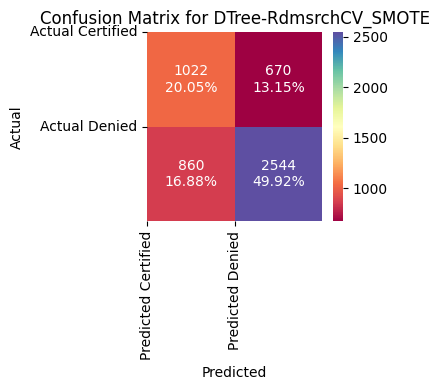

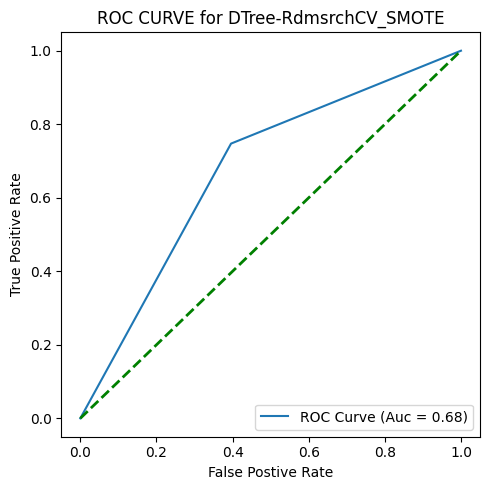

----------------------------------------------------------------------------------------------------
Accuracy 0.7340605259291906 
 Precision 0.7169310368302811 
 Recall 0.7735419421184075 
 F1_Score 0.7441613963184115
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.75      0.69      0.72     13614
           1       0.72      0.77      0.74     13614

    accuracy                           0.73     27228
   macro avg       0.74      0.73      0.73     27228
weighted avg       0.74      0.73      0.73     27228

----------------------------------------------------------------------------------------------------


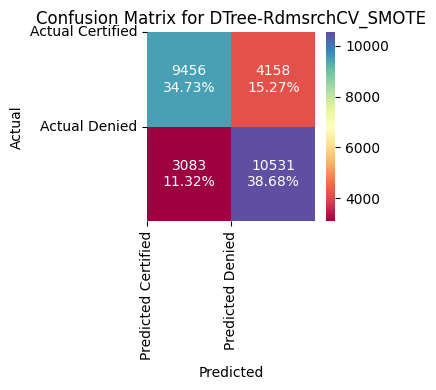

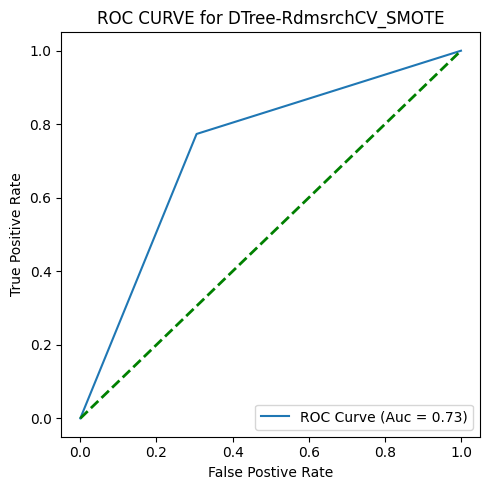

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:Bg-RdmsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   23.0s finished


----------------------------------------------------------------------------------------------------
Bg-RdmsrchCV
Model estimator: BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=150, n_jobs=-1, oob_score=True, random_state=42,
                  verbose=1)
Model Parameter: {'n_estimators': 150, 'estimator__min_samples_split': 2, 'estimator__max_depth': None, 'estimator__criterion': 'gini'}


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.6942700156985872 
 Precision 0.7831288343558283 
 Recall 0.75 
 F1_Score 0.7662064825930373
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.54      0.58      0.56      1692
           1       0.78      0.75      0.77      3404

    accuracy                           0.69      5096
   macro avg       0.66      0.67      0.66      5096
weighted avg       0.70      0.69      0.70      5096

----------------------------------------------------------------------------------------------------


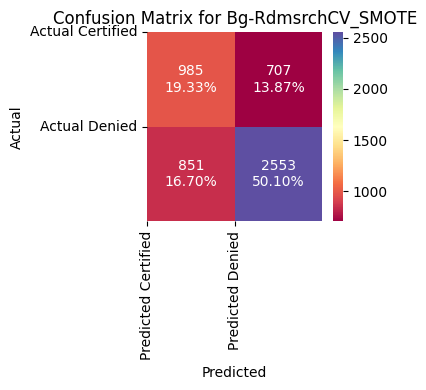

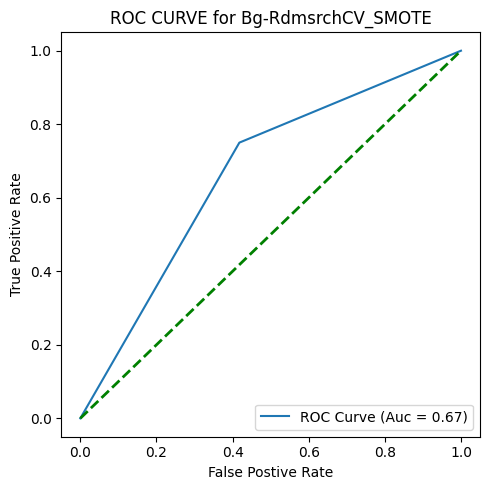

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.1s finished


----------------------------------------------------------------------------------------------------
Accuracy 1.0 
 Precision 1.0 
 Recall 1.0 
 F1_Score 1.0
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     13614
           1       1.00      1.00      1.00     13614

    accuracy                           1.00     27228
   macro avg       1.00      1.00      1.00     27228
weighted avg       1.00      1.00      1.00     27228

----------------------------------------------------------------------------------------------------


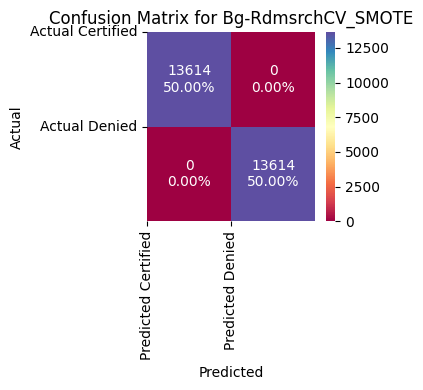

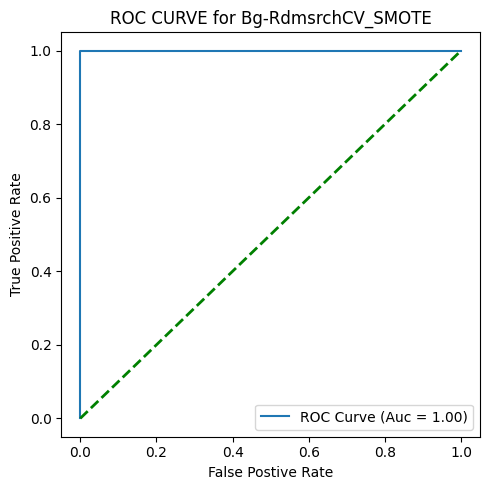

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:RF-RdmnsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


----------------------------------------------------------------------------------------------------
RF-RdmnsrchCV
Model estimator: RandomForestClassifier(max_features='log2', min_samples_leaf=2, n_jobs=-1,
                       random_state=42, verbose=1)
Model Parameter: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
----------------------------------------------------------------------------------------------------
Accuracy 0.7111459968602826 
 Precision 0.7987012987012987 
 Recall 0.7588131609870741 
 F1_Score 0.7782464597770413
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.56      0.62      0.59      1692
           1       0.80      0.76      0.78      3404

    accuracy                           0.71      5096
   macro avg       0.68      0.

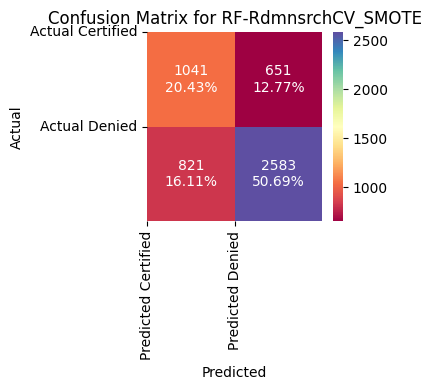

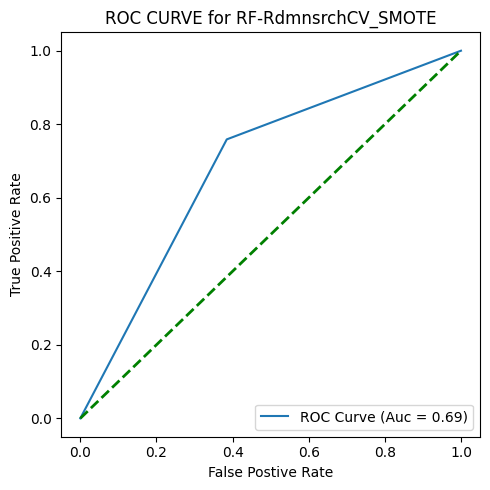

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.9263992948435434 
 Precision 0.9406406558372552 
 Recall 0.9102394593800499 
 F1_Score 0.9251903837539197
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.94      0.93     13614
           1       0.94      0.91      0.93     13614

    accuracy                           0.93     27228
   macro avg       0.93      0.93      0.93     27228
weighted avg       0.93      0.93      0.93     27228

----------------------------------------------------------------------------------------------------


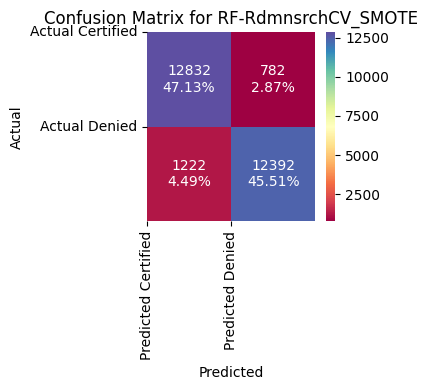

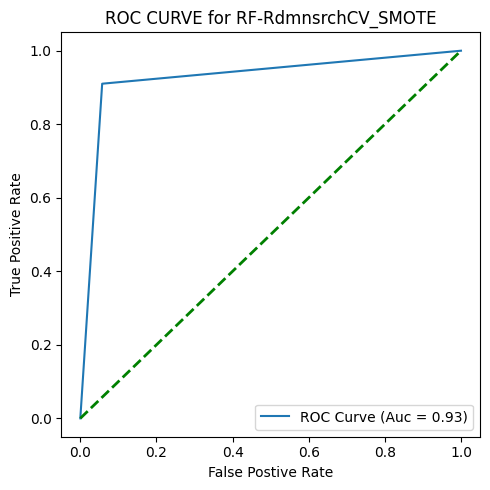

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [77]:
result_model_smote,df_Test_smote, df_Train_smote = ObjectBagging.RandomSearchCV_HyperTune(dict_Transformed_dataset['Feature_Train_Resample'],dict_Transformed_dataset['Feature_Test_Scaled'],
                                                 dict_Transformed_dataset['Target_Train_Resample'],dict_Transformed_dataset['Target_Test'],'SMOTE')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_smote], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_smote], axis = 0, ignore_index = True)

In [78]:
result_model_smote

{'DTree-RdmsrchCV_Best Estimator': DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=40,
                        random_state=42),
 'DTree-RdmsrchCV_Best Parameter': {'min_samples_split': 40,
  'min_samples_leaf': 10,
  'max_leaf_nodes': None,
  'max_features': None,
  'max_depth': 10,
  'criterion': 'gini'},
 'DTree-RdmsrchCV_Best Score': 0.7093433230498016,
 'Bg-RdmsrchCV_Best Estimator': BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   n_estimators=150, n_jobs=-1, oob_score=True, random_state=42,
                   verbose=1),
 'Bg-RdmsrchCV_Best Parameter': {'n_estimators': 150,
  'estimator__min_samples_split': 2,
  'estimator__max_depth': None,
  'estimator__criterion': 'gini'},
 'Bg-RdmsrchCV_Best Score': 0.7571984721610109,
 'RF-RdmnsrchCV_Best Estimator': RandomForestClassifier(max_features='log2', min_samples_leaf=2, n_jobs=-1,
                        random_state=42, verbose=1),
 'RF-RdmnsrchCV_Best Parameter':

In [79]:
df_Test_smote

Type DatasetType  Accuracy  Precision    Recall  F1-Score  \
0  DTree-RdmsrchCV_SMOTE        Test  0.699765   0.791537  0.747356  0.768812   
1     Bg-RdmsrchCV_SMOTE        Test  0.694270   0.783129  0.750000  0.766206   
2    RF-RdmnsrchCV_SMOTE        Test  0.711146   0.798701  0.758813  0.778246   

    ROC_AUC  
0  0.675687  
1  0.666076  
2  0.687031

In [80]:
df_Train_smote

Type DatasetType  Accuracy  Precision    Recall  F1-Score  \
0  DTree-RdmsrchCV_SMOTE       Train  0.734061   0.716931  0.773542  0.744161   
1     Bg-RdmsrchCV_SMOTE       Train  1.000000   1.000000  1.000000  1.000000   
2    RF-RdmnsrchCV_SMOTE       Train  0.926399   0.940641  0.910239  0.925190   

    ROC_AUC  
0  0.734061  
1  1.000000  
2  0.926399

OBSERVATION HYPERTUNE SMOTE
* Post hyper tuning Recall value is close for Decision tree and Bagging and RandomForest classifier
* RF has good Recall value of 0.75
* Overall ROC AUC is 68% which is good generalization of the new dataset
* Hyper Tuned best estimator and score were published above rubric


## HYPERTUNING-RANDOMIZEDSEARCHCV - UNDERSAMPLE DATASET DECISION TREE, RANDOM FOREST & BAGGING CLASSIFIER

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:DTree-RdmsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits
----------------------------------------------------------------------------------------------------
DTree-RdmsrchCV
Model estimator: DecisionTreeClassifier(max_depth=30, max_leaf_nodes=20, min_samples_leaf=15,
                       min_samples_split=20, random_state=42)
Model Parameter: {'min_samples_split': 20, 'min_samples_leaf': 15, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
----------------------------------------------------------------------------------------------------
Accuracy 0.7060439560439561 
 Precision 0.8056446440025657 
 Recall 0.7379553466509988 
 F1_Score 0.7703158540325054
--------------

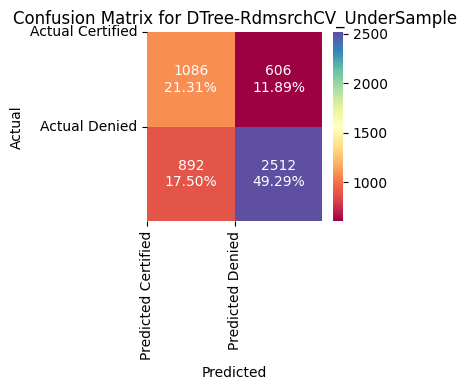

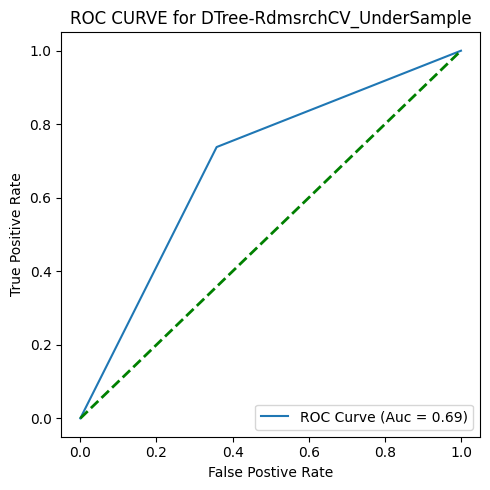

----------------------------------------------------------------------------------------------------
Accuracy 0.7096011816838995 
 Precision 0.6939054386444383 
 Recall 0.7500738552437223 
 F1_Score 0.7208972174900624
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.73      0.67      0.70      6770
           1       0.69      0.75      0.72      6770

    accuracy                           0.71     13540
   macro avg       0.71      0.71      0.71     13540
weighted avg       0.71      0.71      0.71     13540

----------------------------------------------------------------------------------------------------


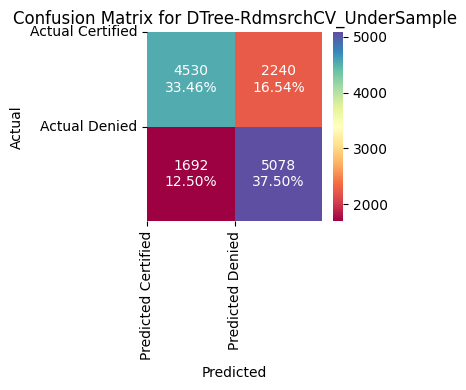

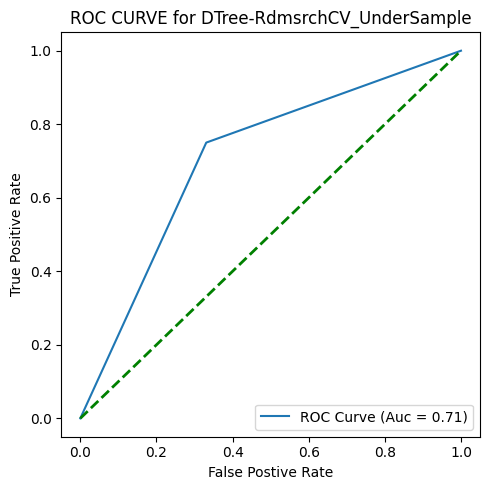

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:Bg-RdmsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    6.0s finished


----------------------------------------------------------------------------------------------------
Bg-RdmsrchCV
Model estimator: BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=10,
                                                   min_samples_split=15,
                                                   random_state=42),
                  n_estimators=150, n_jobs=-1, oob_score=True, random_state=42,
                  verbose=1)
Model Parameter: {'n_estimators': 150, 'estimator__min_samples_split': 15, 'estimator__max_depth': 10, 'estimator__criterion': 'entropy'}


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.7048665620094191 
 Precision 0.8074433656957929 
 Recall 0.7329612220916569 
 F1_Score 0.7684016014782876
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.55      0.65      0.59      1692
           1       0.81      0.73      0.77      3404

    accuracy                           0.70      5096
   macro avg       0.68      0.69      0.68      5096
weighted avg       0.72      0.70      0.71      5096

----------------------------------------------------------------------------------------------------


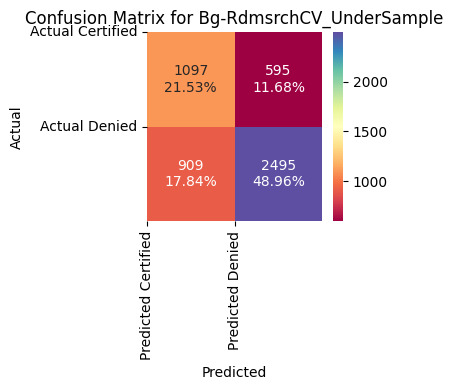

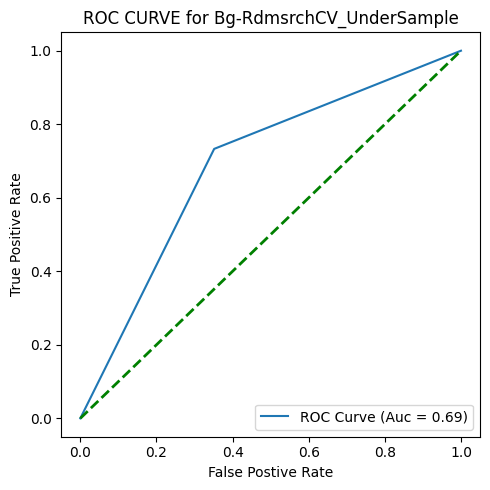

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.7525110782865584 
 Precision 0.738125087059479 
 Recall 0.7827178729689808 
 F1_Score 0.7597677252849666
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.77      0.72      0.74      6770
           1       0.74      0.78      0.76      6770

    accuracy                           0.75     13540
   macro avg       0.75      0.75      0.75     13540
weighted avg       0.75      0.75      0.75     13540

----------------------------------------------------------------------------------------------------


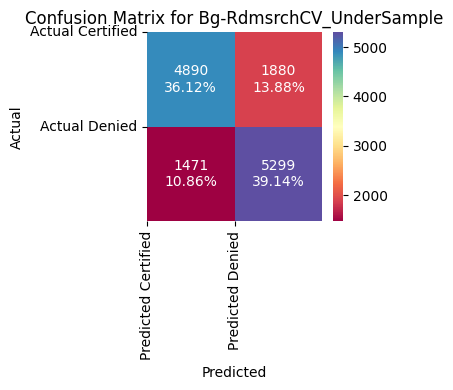

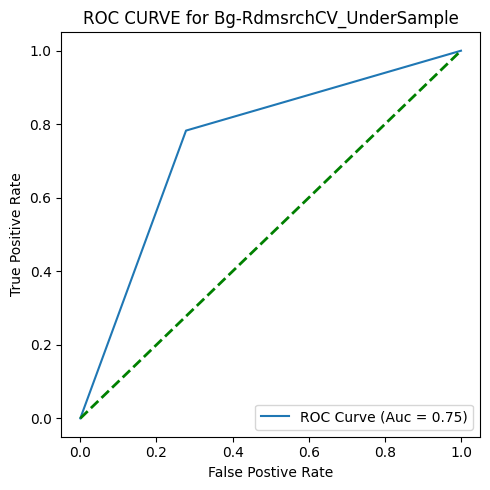

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hyper parameter Tuning using Randomized search CV for the algorithm:RF-RdmnsrchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.1s finished


----------------------------------------------------------------------------------------------------
RF-RdmnsrchCV
Model estimator: RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=8,
                       n_estimators=150, n_jobs=-1, random_state=42, verbose=1)
Model Parameter: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}
----------------------------------------------------------------------------------------------------
Accuracy 0.7042778649921507 
 Precision 0.817968488099229 
 Recall 0.7168037602820212 
 F1_Score 0.7640519805855644
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.54      0.68      0.60      1692
           1       0.82      0.72      0.76      3404

    accuracy                           0.70      5096
  

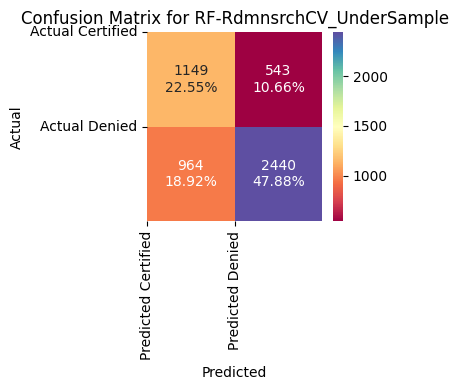

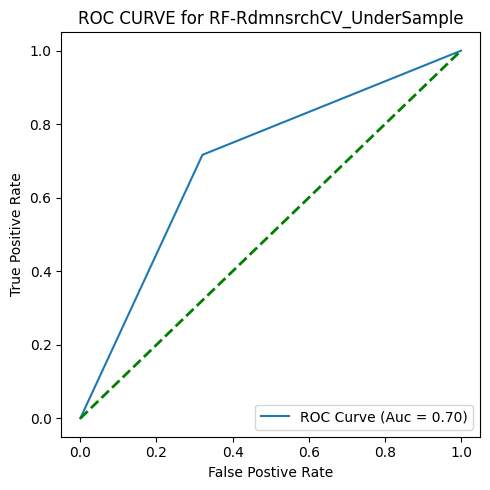

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.2s finished


----------------------------------------------------------------------------------------------------
Accuracy 0.7725997045790252 
 Precision 0.7684363636363636 
 Recall 0.780354505169867 
 F1_Score 0.7743495786002199
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.78      0.76      0.77      6770
           1       0.77      0.78      0.77      6770

    accuracy                           0.77     13540
   macro avg       0.77      0.77      0.77     13540
weighted avg       0.77      0.77      0.77     13540

----------------------------------------------------------------------------------------------------


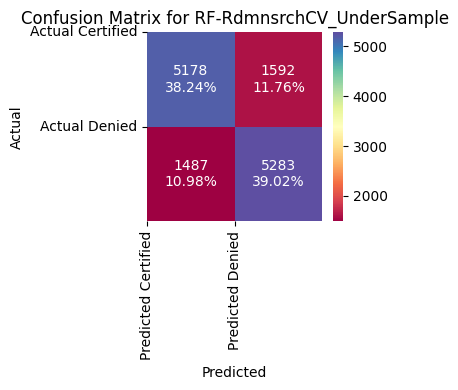

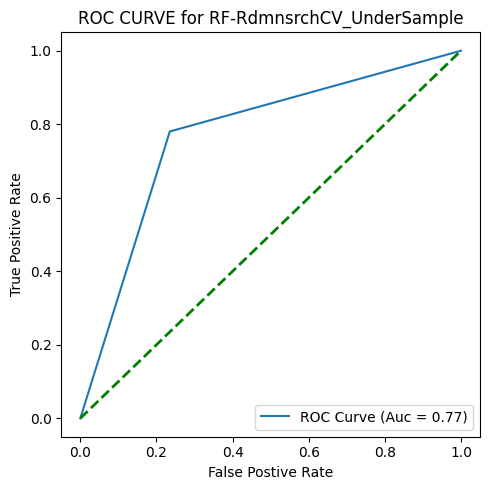

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [81]:
result_model_usmpl,df_Test_usmpl,df_Train_usmpl = ObjectBagging.RandomSearchCV_HyperTune(dict_Transformed_dataset['Feature_Train_UnderSample'],dict_Transformed_dataset['Feature_Test_Scaled'],
                                                dict_Transformed_dataset['Target_Train_UnderSample'],dict_Transformed_dataset['Target_Test'],'UnderSample')
overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_usmpl], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_usmpl], axis = 0, ignore_index = True)

In [82]:
result_model_usmpl

{'DTree-RdmsrchCV_Best Estimator': DecisionTreeClassifier(max_depth=30, max_leaf_nodes=20, min_samples_leaf=15,
                        min_samples_split=20, random_state=42),
 'DTree-RdmsrchCV_Best Parameter': {'min_samples_split': 20,
  'min_samples_leaf': 15,
  'max_leaf_nodes': 20,
  'max_features': None,
  'max_depth': 30,
  'criterion': 'gini'},
 'DTree-RdmsrchCV_Best Score': 0.7081237409197074,
 'Bg-RdmsrchCV_Best Estimator': BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    min_samples_split=15,
                                                    random_state=42),
                   n_estimators=150, n_jobs=-1, oob_score=True, random_state=42,
                   verbose=1),
 'Bg-RdmsrchCV_Best Parameter': {'n_estimators': 150,
  'estimator__min_samples_split': 15,
  'estimator__max_depth': 10,
  'estimator__criterion': 'entropy'},
 'Bg-Rdms

In [83]:
df_Test_usmpl

Type DatasetType  Accuracy  Precision    Recall  \
0  DTree-RdmsrchCV_UnderSample        Test  0.706044   0.805645  0.737955   
1     Bg-RdmsrchCV_UnderSample        Test  0.704867   0.807443  0.732961   
2    RF-RdmnsrchCV_UnderSample        Test  0.704278   0.817968  0.716804   

   F1-Score   ROC_AUC  
0  0.770316  0.689900  
1  0.768402  0.690653  
2  0.764052  0.697941

In [84]:
df_Train_usmpl

Type DatasetType  Accuracy  Precision    Recall  \
0  DTree-RdmsrchCV_UnderSample       Train  0.709601   0.693905  0.750074   
1     Bg-RdmsrchCV_UnderSample       Train  0.752511   0.738125  0.782718   
2    RF-RdmnsrchCV_UnderSample       Train  0.772600   0.768436  0.780355   

   F1-Score   ROC_AUC  
0  0.720897  0.709601  
1  0.759768  0.752511  
2  0.774350  0.772600

Observation HyperTuned Undersample

* undersample dataset hypertuned reduced the overfiting
* Bagging Recall show high of value 0.74 comparing with other classifier
* ROC AUC overall produced 69% which still holds good for new dataset

## OVERALL METRICS - HYPERTUNING - RANDOMIZEDSEARCHCV

In [85]:
overall_Test_Metrics.sort_values(by='Recall', ascending=False).reset_index(drop=True)

Type DatasetType  Accuracy  Precision  \
0                 RF-RdmnsrchCV_Original        Test  0.739600   0.763914   
1                  Bg-RdmsrchCV_Original        Test  0.739796   0.776183   
2               DTree-RdmsrchCV_Original        Test  0.731358   0.773890   
3        RandomForestClassifier_Original        Test  0.721350   0.767241   
4            Bagging Classifier_Original        Test  0.716641   0.765295   
5                    RF-RdmnsrchCV_SMOTE        Test  0.711146   0.798701   
6           RandomForestClassifier_SMOTE        Test  0.698195   0.786900   
7                     Bg-RdmsrchCV_SMOTE        Test  0.694270   0.783129   
8                  DTree-RdmsrchCV_SMOTE        Test  0.699765   0.791537   
9               Bagging Classifier_SMOTE        Test  0.692896   0.783884   
10           DTree-RdmsrchCV_UnderSample        Test  0.706044   0.805645   
11     Decision Tree Classifier_Original        Test  0.652669   0.741859   
12              Bg-RdmsrchCV_UnderSample        Test  0.704867   0.807443   
13             RF-RdmnsrchCV_UnderSample        Test  0.704278   0.817968   
14        Decision Tree Classifier_SMOTE        Test  0.646193   0.753083   
15    RandomForestClassifier_UnderSample        Test  0.677590   0.814352   
16        Bagging Classifier_UnderSample        Test  0.676217   0.815241   
17  Decision Tree Classifier_UnderSample        Test  0.614011   0.764836   

      Recall  F1-Score   ROC_AUC  
0   0.883079  0.819185  0.667012  
1   0.857814  0.814960  0.680089  
2   0.844595  0.807698  0.674070  
3   0.836663  0.800450  0.663012  
4   0.830494  0.796562  0.659041  
5   0.758813  0.778246  0.687031  
6   0.751763  0.768930  0.671094  
7   0.750000  0.766206  0.666076  
8   0.747356  0.768812  0.675687  
9   0.745887  0.764414  0.666088  
10  0.737955  0.770316  0.689900  
11  0.736193  0.739015  0.610413  
12  0.732961  0.768402  0.690653  
13  0.716804  0.764052  0.697941  
14  0.699765  0.725445  0.619091  
15  0.670094  0.735214  0.681383  
16  0.666275  0.733269  0.681246  
17  0.609577  0.678437  0.616254

In [86]:
overall_Train_Metrics.sort_values(by='Recall', ascending=False).reset_index(drop=True)

Type DatasetType  Accuracy  Precision  \
0      Decision Tree Classifier_Original       Train  1.000000   1.000000   
1                     Bg-RdmsrchCV_SMOTE       Train  1.000000   1.000000   
2            Bagging Classifier_Original       Train  1.000000   1.000000   
3         Decision Tree Classifier_SMOTE       Train  1.000000   1.000000   
4           RandomForestClassifier_SMOTE       Train  1.000000   1.000000   
5               Bagging Classifier_SMOTE       Train  1.000000   1.000000   
6   Decision Tree Classifier_UnderSample       Train  1.000000   1.000000   
7     RandomForestClassifier_UnderSample       Train  1.000000   1.000000   
8         Bagging Classifier_UnderSample       Train  1.000000   1.000000   
9        RandomForestClassifier_Original       Train  0.999951   0.999927   
10                   RF-RdmnsrchCV_SMOTE       Train  0.926399   0.940641   
11                RF-RdmnsrchCV_Original       Train  0.764521   0.782681   
12                 Bg-RdmsrchCV_Original       Train  0.770604   0.798690   
13              DTree-RdmsrchCV_Original       Train  0.743622   0.784725   
14              Bg-RdmsrchCV_UnderSample       Train  0.752511   0.738125   
15             RF-RdmnsrchCV_UnderSample       Train  0.772600   0.768436   
16                 DTree-RdmsrchCV_SMOTE       Train  0.734061   0.716931   
17           DTree-RdmsrchCV_UnderSample       Train  0.709601   0.693905   

      Recall  F1-Score   ROC_AUC  
0   1.000000  1.000000  1.000000  
1   1.000000  1.000000  1.000000  
2   1.000000  1.000000  1.000000  
3   1.000000  1.000000  1.000000  
4   1.000000  1.000000  1.000000  
5   1.000000  1.000000  1.000000  
6   1.000000  1.000000  1.000000  
7   1.000000  1.000000  1.000000  
8   1.000000  1.000000  1.000000  
9   1.000000  0.999963  0.999926  
10  0.910239  0.925190  0.926399  
11  0.896283  0.835639  0.697920  
12  0.877773  0.836366  0.716434  
13  0.849052  0.815622  0.690331  
14  0.782718  0.759768  0.752511  
15  0.780355  0.774350  0.772600  
16  0.773542  0.744161  0.734061  
17  0.750074  0.720897  0.709601

# ENSEMBLE - BOOSTING
ADABOOSTING & GRADIENT BOOSTING

In [87]:
class Ensemble_Boosting_Model(MetricCalculation):
  def __init__(self):
    super().__init__()
    self.df_Metrics_Test = pd.DataFrame()
    self.df_Metrics_Train = pd.DataFrame()

  def ModelExecution(self,feature_train, feature_test, target_train, target_test,typeofmodel):
    DTreeClF = DecisionTreeClassifier(random_state = 42,max_depth=1)
    ## ADABOOST Classifier
    adaBoost_Clf = AdaBoostClassifier(estimator=DTreeClF,random_state = 42, algorithm='SAMME')
    ## Gradient BOOST Classifier
    gradBoost_ClF = GradientBoostingClassifier(init=DTreeClF, random_state=42)

    dict_models = {'DecisionTreeClassifier':DTreeClF, 'AdaBoosting':adaBoost_Clf, 'GradientBoostingClF':gradBoost_ClF}
    self.df_Metrics_Test = pd.DataFrame()
    self.df_Metrics_Train = pd.DataFrame()
    for mdl_name, execute_Model in dict_models.items():
      execute_Model.fit(feature_train, target_train)
      prediction_proba_Test = execute_Model.predict_proba(feature_test)[:,1]
      predicted_output_Test = (prediction_proba_Test > 0.5).astype(int)
      Metrics_Test = self.CalculatingMetrices(target_test,predicted_output_Test,mdl_name+'_'+typeofmodel,'Test')
      self.df_Metrics_Test = pd.concat([self.df_Metrics_Test,Metrics_Test],axis=0,ignore_index=True)

      prediction_proba_Train = execute_Model.predict_proba(feature_train)[:,1]
      predicted_output_Train = (prediction_proba_Train > 0.5).astype(int)
      Metrics_Train = self.CalculatingMetrices(target_train,predicted_output_Train,mdl_name+'_'+typeofmodel,'Train')
      self.df_Metrics_Train = pd.concat([self.df_Metrics_Train,Metrics_Train],axis =0,ignore_index=True)

    return self.df_Metrics_Test, self.df_Metrics_Train





  def RandomSearchCV_HyperTune(self, feature_train, feature_test, target_train, target_test, typeofmodel):




    DTreeClF = [DecisionTreeClassifier(random_state = 42,max_depth=1),DecisionTreeClassifier(random_state = 42,max_depth=2)]
    adaBoost_clf = AdaBoostClassifier()
    GradBoost_clf = GradientBoostingClassifier()

    param_adaboost = {'estimator':DTreeClF, 'n_estimators': randint(50,200), 'learning_rate':uniform(0.01,1),
                      'algorithm':['SAMME','SAMME.R'],'random_state':[42] }

    param_gradboost = {'n_estimators':randint(50,200), 'learning_rate':uniform(0.01,1),'random_state':[42],
                       'max_depth': randint(3,7), 'subsample':uniform(0.7,1.0), 'min_samples_split':randint(2,10),
                       'min_samples_leaf':randint(1,10),'max_features':['sqrt','log2',None],'criterion':['friedman_mse','squared_error']
                       }

    adaboost_RandmzedSearch = RandomizedSearchCV(estimator=adaBoost_clf,param_distributions=param_adaboost,n_iter=50,cv=3,n_jobs=-1,verbose=1,random_state=42)
    gradboost_RandmmizedSearch = RandomizedSearchCV(GradBoost_clf,param_distributions=param_gradboost,n_iter=50,cv=3,n_jobs=-1,verbose=1,random_state=42)




    dict_models = {'AdaBoost-HyperTune': adaboost_RandmzedSearch,
                   'GradBoost-HyperTune':gradboost_RandmmizedSearch}

    self.df_Metrics_Test = pd.DataFrame()
    self.df_Metrics_Train = pd.DataFrame()
    result_model = {}
    for model_name, model_execute in dict_models.items():
      model_execute.fit(feature_train,target_train)
      best_parameter = model_execute.best_params_
      best_score = model_execute.best_score_
      best_estimator = model_execute.best_estimator_
      tuned_CVResult = model_execute.cv_results_

      print('-'*100)
      print(model_name)
      print(f'Model estimator: {best_estimator}')
      print(f'Model Parameter: {best_parameter}')
      result_model[model_name+'_'+'Best Estimator'] = best_estimator
      result_model[model_name+'_'+'Best Parameter'] = best_parameter
      result_model[model_name+'_'+'Best Score'] = best_score

      prediction_proba_Test = best_estimator.predict_proba(feature_test)[:,1]
      predicted_output_Test = (prediction_proba_Test > 0.5).astype(int)
      Metrics_Test = self.CalculatingMetrices(target_test,predicted_output_Test,model_name+'_'+typeofmodel,'Test')
      self.df_Metrics_Test = pd.concat([self.df_Metrics_Test,Metrics_Test],axis=0,ignore_index=True)

      prediction_proba_Train = best_estimator.predict_proba(feature_train)[:,1]
      predicted_output_Train = (prediction_proba_Train > 0.5).astype(int)
      Metrics_Train = self.CalculatingMetrices(target_train,predicted_output_Train,model_name+'_'+typeofmodel,'Train')
      self.df_Metrics_Train = pd.concat([self.df_Metrics_Train,Metrics_Train],axis =0,ignore_index=True)

    return result_model,self.df_Metrics_Test, self.df_Metrics_Train












## Object Creation
ObjBoosting = Ensemble_Boosting_Model()

## BOOSTING -ORIGINAL DATASET ADABOOSTING & GRADIENT BOOSTING

----------------------------------------------------------------------------------------------------
Accuracy 0.7091836734693877 
 Precision 0.7171260732037957 
 Recall 0.9324324324324325 
 F1_Score 0.810727969348659
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.66      0.26      0.37      1692
           1       0.72      0.93      0.81      3404

    accuracy                           0.71      5096
   macro avg       0.69      0.60      0.59      5096
weighted avg       0.70      0.71      0.67      5096

----------------------------------------------------------------------------------------------------


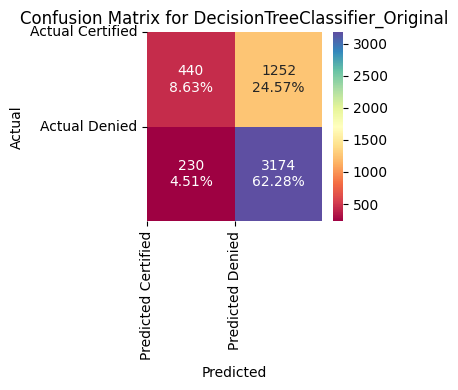

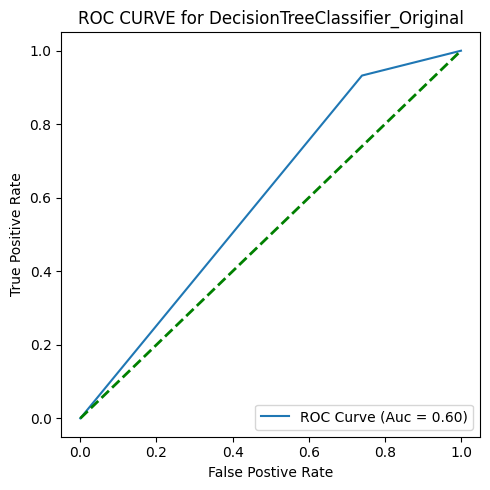

----------------------------------------------------------------------------------------------------
Accuracy 0.7111459968602826 
 Precision 0.7190654417602359 
 Recall 0.9313941530777141 
 F1_Score 0.8115719406041987
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.66      0.27      0.38      6770
           1       0.72      0.93      0.81     13614

    accuracy                           0.71     20384
   macro avg       0.69      0.60      0.60     20384
weighted avg       0.70      0.71      0.67     20384

----------------------------------------------------------------------------------------------------


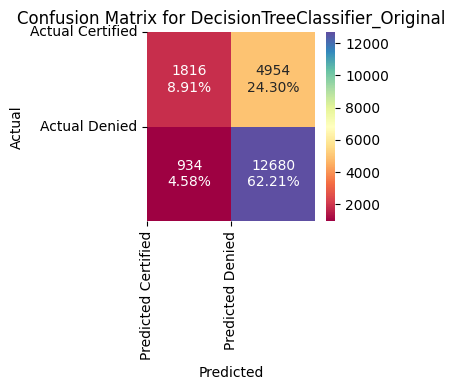

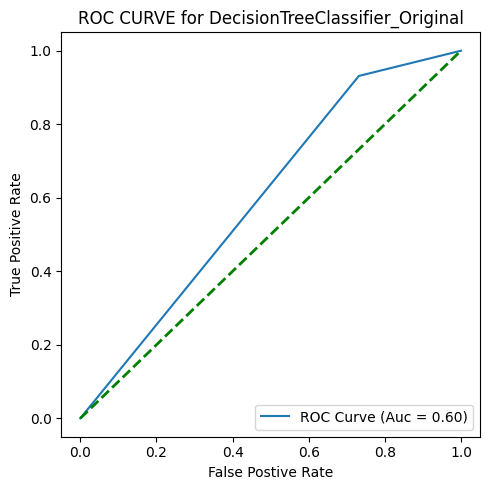

----------------------------------------------------------------------------------------------------
Accuracy 0.7315541601255887 
 Precision 0.7559074912016088 
 Recall 0.8833725029377203 
 F1_Score 0.8146843673801137
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.64      0.43      0.51      1692
           1       0.76      0.88      0.81      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.65      0.66      5096
weighted avg       0.72      0.73      0.71      5096

----------------------------------------------------------------------------------------------------


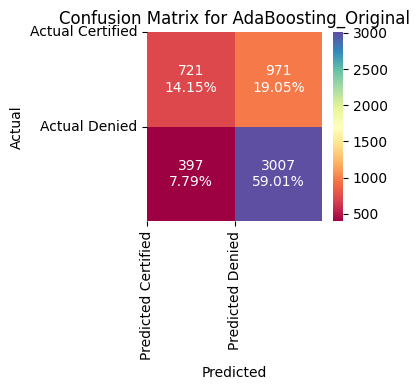

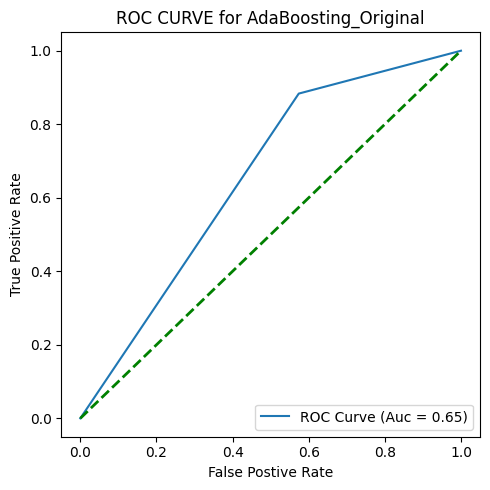

----------------------------------------------------------------------------------------------------
Accuracy 0.7383241758241759 
 Precision 0.7613636363636364 
 Recall 0.8858527985896871 
 F1_Score 0.8189040537787737
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.66      0.44      0.53      6770
           1       0.76      0.89      0.82     13614

    accuracy                           0.74     20384
   macro avg       0.71      0.66      0.67     20384
weighted avg       0.73      0.74      0.72     20384

----------------------------------------------------------------------------------------------------


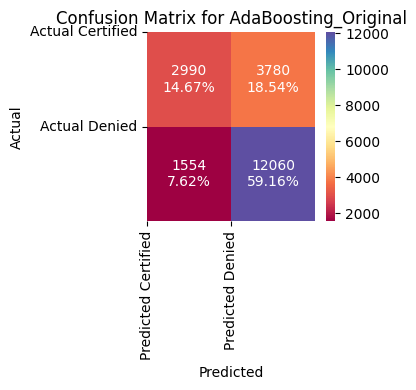

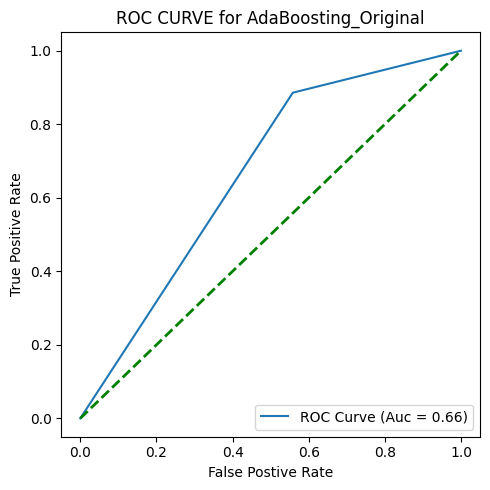

----------------------------------------------------------------------------------------------------
Accuracy 0.7397959183673469 
 Precision 0.7725603357817419 
 Recall 0.8651586368977673 
 F1_Score 0.8162416851441242
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.64      0.49      0.55      1692
           1       0.77      0.87      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.68      0.69      5096
weighted avg       0.73      0.74      0.73      5096

----------------------------------------------------------------------------------------------------


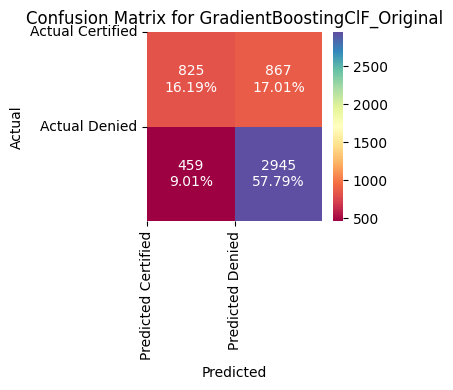

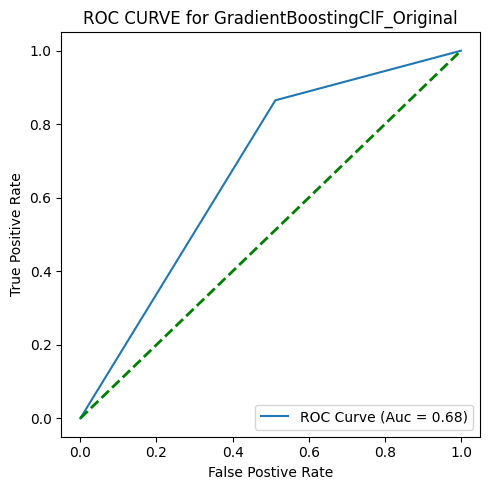

----------------------------------------------------------------------------------------------------
Accuracy 0.7546605180533752 
 Precision 0.7853309481216458 
 Recall 0.870647862494491 
 F1_Score 0.8257916187689414
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.67      0.52      0.59      6770
           1       0.79      0.87      0.83     13614

    accuracy                           0.75     20384
   macro avg       0.73      0.70      0.71     20384
weighted avg       0.75      0.75      0.75     20384

----------------------------------------------------------------------------------------------------


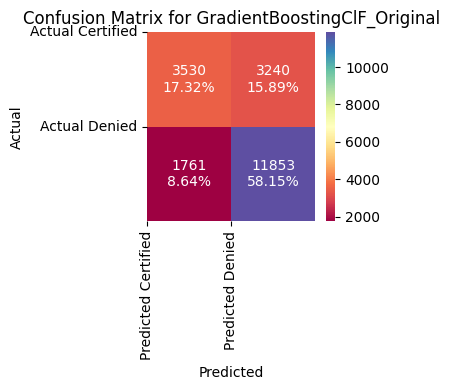

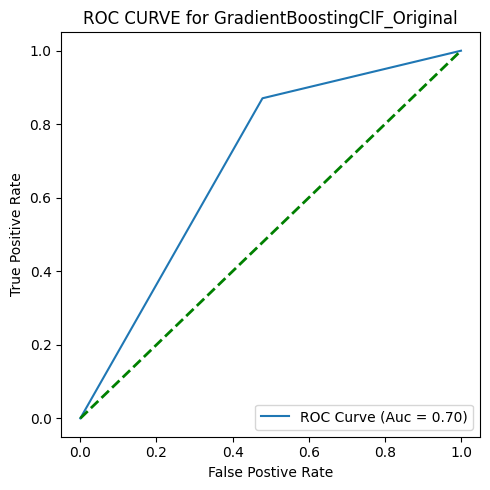

In [88]:
df_Test_BOG, df_Train_BOG = ObjBoosting.ModelExecution(dict_Transformed_dataset['Feature_Train'],dict_Transformed_dataset['Feature_Test'],
                                                 dict_Transformed_dataset['Target_Train'],dict_Transformed_dataset['Target_Test'],'Original')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_BOG], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_BOG], axis = 0, ignore_index = True)

In [89]:
df_Test_BOG

Type DatasetType  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier_Original        Test  0.709184   0.717126  0.932432   
1             AdaBoosting_Original        Test  0.731554   0.755907  0.883373   
2     GradientBoostingClF_Original        Test  0.739796   0.772560  0.865159   

   F1-Score   ROC_AUC  
0  0.810728  0.596240  
1  0.814684  0.654748  
2  0.816242  0.676374

In [90]:
df_Train_BOG

Type DatasetType  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier_Original       Train  0.711146   0.719065  0.931394   
1             AdaBoosting_Original       Train  0.738324   0.761364  0.885853   
2     GradientBoostingClF_Original       Train  0.754661   0.785331  0.870648   

   F1-Score   ROC_AUC  
0  0.811572  0.599818  
1  0.818904  0.663754  
2  0.825792  0.696033

Observation:
* No Overfiting observed
* AdaBoost Recall has 0.88 & GradBoost Recall has 0.86 which shows good performance of the model


## BOOSTING - SMOTE DATASET ADABOOSTING & GRADIENT BOOSTING

----------------------------------------------------------------------------------------------------
Accuracy 0.7091836734693877 
 Precision 0.7171260732037957 
 Recall 0.9324324324324325 
 F1_Score 0.810727969348659
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.66      0.26      0.37      1692
           1       0.72      0.93      0.81      3404

    accuracy                           0.71      5096
   macro avg       0.69      0.60      0.59      5096
weighted avg       0.70      0.71      0.67      5096

----------------------------------------------------------------------------------------------------


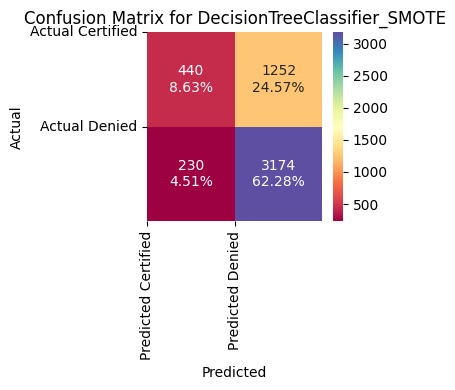

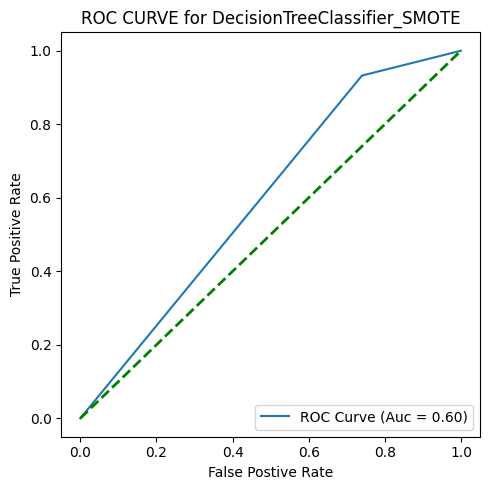

----------------------------------------------------------------------------------------------------
Accuracy 0.6004480681651241 
 Precision 0.5604419889502762 
 Recall 0.9313941530777141 
 F1_Score 0.6997985595629018
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.80      0.27      0.40     13614
           1       0.56      0.93      0.70     13614

    accuracy                           0.60     27228
   macro avg       0.68      0.60      0.55     27228
weighted avg       0.68      0.60      0.55     27228

----------------------------------------------------------------------------------------------------


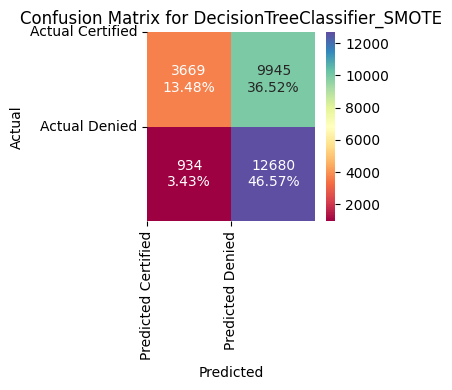

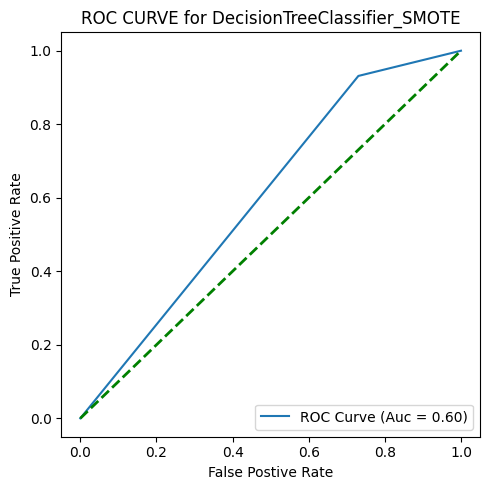

----------------------------------------------------------------------------------------------------
Accuracy 0.6928963893249608 
 Precision 0.797092084006462 
 Recall 0.7247356051703878 
 F1_Score 0.759193722111094
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.53      0.63      0.58      1692
           1       0.80      0.72      0.76      3404

    accuracy                           0.69      5096
   macro avg       0.66      0.68      0.67      5096
weighted avg       0.71      0.69      0.70      5096

----------------------------------------------------------------------------------------------------


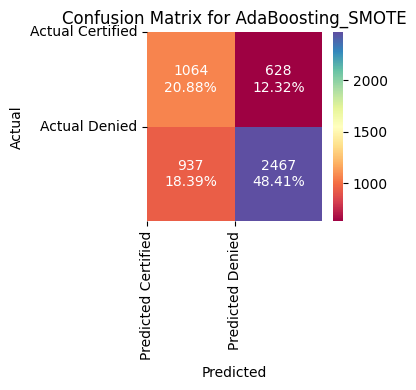

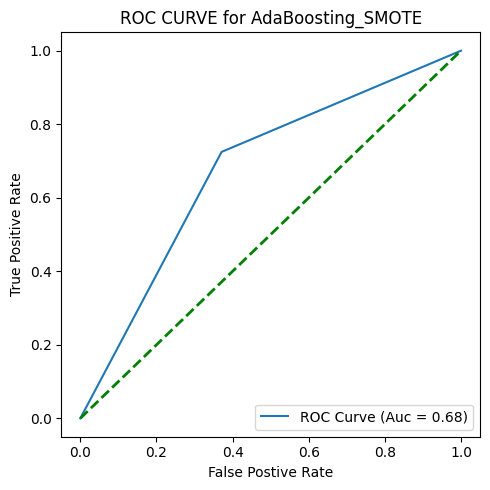

----------------------------------------------------------------------------------------------------
Accuracy 0.7035037461436756 
 Precision 0.6889965209086568 
 Recall 0.7418833553694726 
 F1_Score 0.7144625614543911
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.67      0.69     13614
           1       0.69      0.74      0.71     13614

    accuracy                           0.70     27228
   macro avg       0.70      0.70      0.70     27228
weighted avg       0.70      0.70      0.70     27228

----------------------------------------------------------------------------------------------------


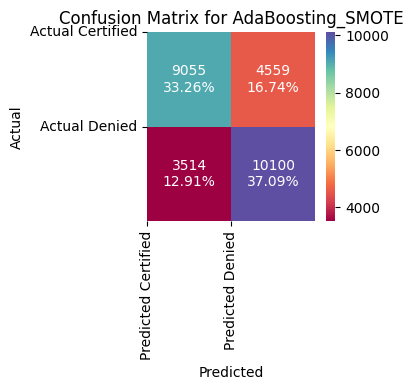

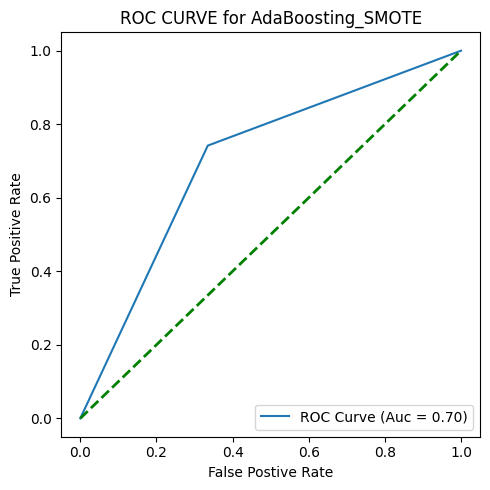

----------------------------------------------------------------------------------------------------
Accuracy 0.7087912087912088 
 Precision 0.8061224489795918 
 Recall 0.7426556991774383 
 F1_Score 0.7730886850152905
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.55      0.64      0.59      1692
           1       0.81      0.74      0.77      3404

    accuracy                           0.71      5096
   macro avg       0.68      0.69      0.68      5096
weighted avg       0.72      0.71      0.71      5096

----------------------------------------------------------------------------------------------------


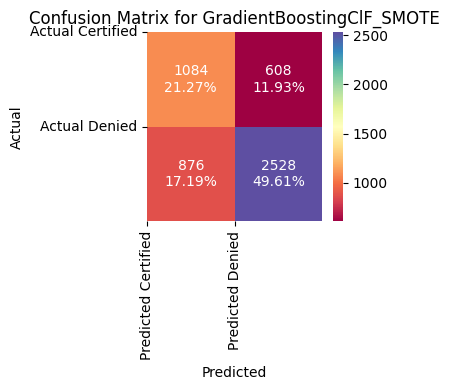

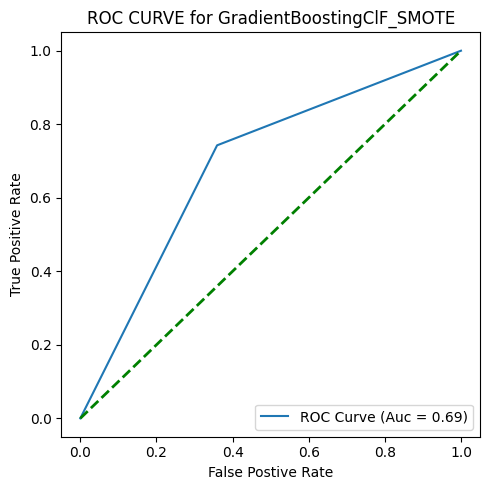

----------------------------------------------------------------------------------------------------
Accuracy 0.7434626120170413 
 Precision 0.7384017837876717 
 Recall 0.754076685764654 
 F1_Score 0.7461569211760003
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.75      0.73      0.74     13614
           1       0.74      0.75      0.75     13614

    accuracy                           0.74     27228
   macro avg       0.74      0.74      0.74     27228
weighted avg       0.74      0.74      0.74     27228

----------------------------------------------------------------------------------------------------


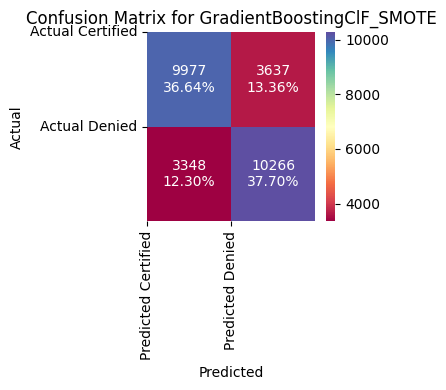

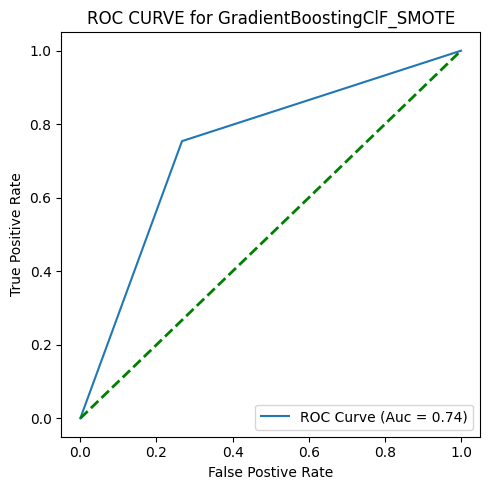

In [91]:
df_Test_BSMOTE, df_Train_BSMOTE = ObjBoosting.ModelExecution(dict_Transformed_dataset['Feature_Train_Resample'],dict_Transformed_dataset['Feature_Test_Scaled'],
                                                 dict_Transformed_dataset['Target_Train_Resample'],dict_Transformed_dataset['Target_Test'],'SMOTE')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_BSMOTE], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_BSMOTE], axis = 0, ignore_index = True)

In [92]:
df_Test_BSMOTE

Type DatasetType  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier_SMOTE        Test  0.709184   0.717126  0.932432   
1             AdaBoosting_SMOTE        Test  0.692896   0.797092  0.724736   
2     GradientBoostingClF_SMOTE        Test  0.708791   0.806122  0.742656   

   F1-Score   ROC_AUC  
0  0.810728  0.596240  
1  0.759194  0.676789  
2  0.773089  0.691659

In [93]:
df_Train_BSMOTE

Type DatasetType  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier_SMOTE       Train  0.600448   0.560442  0.931394   
1             AdaBoosting_SMOTE       Train  0.703504   0.688997  0.741883   
2     GradientBoostingClF_SMOTE       Train  0.743463   0.738402  0.754077   

   F1-Score   ROC_AUC  
0  0.699799  0.600448  
1  0.714463  0.703504  
2  0.746157  0.743463

Observation:
* No Overfitting observed between Test and Train
* Ada Boost REcall is 0.72 & Grad Boosting showing the 0.74 Recall where the positive prediction is good

## BOOSTING - UNDERSAMPLE DATASET ADABOOSTING & GRADIENT BOOSTING

----------------------------------------------------------------------------------------------------
Accuracy 0.7091836734693877 
 Precision 0.7171260732037957 
 Recall 0.9324324324324325 
 F1_Score 0.810727969348659
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.66      0.26      0.37      1692
           1       0.72      0.93      0.81      3404

    accuracy                           0.71      5096
   macro avg       0.69      0.60      0.59      5096
weighted avg       0.70      0.71      0.67      5096

----------------------------------------------------------------------------------------------------


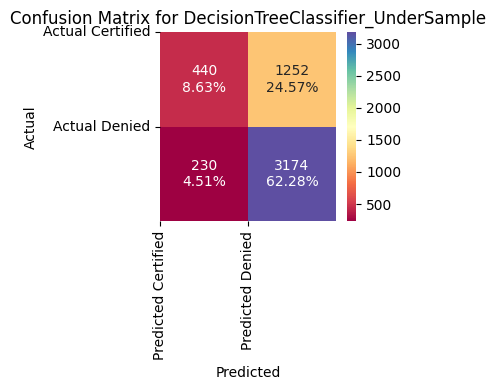

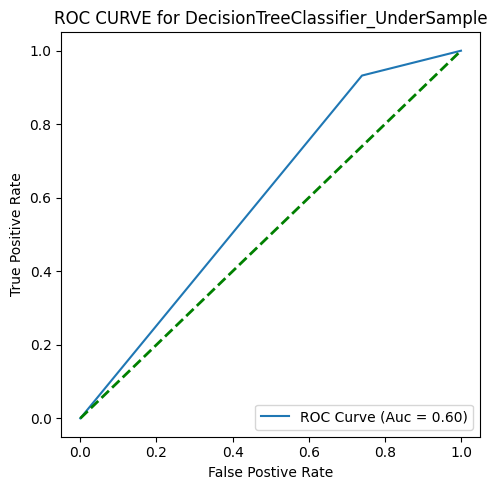

----------------------------------------------------------------------------------------------------
Accuracy 0.5988921713441654 
 Precision 0.5595269849737707 
 Recall 0.9295420974889217 
 F1_Score 0.698562468779486
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.27      0.40      6770
           1       0.56      0.93      0.70      6770

    accuracy                           0.60     13540
   macro avg       0.68      0.60      0.55     13540
weighted avg       0.68      0.60      0.55     13540

----------------------------------------------------------------------------------------------------


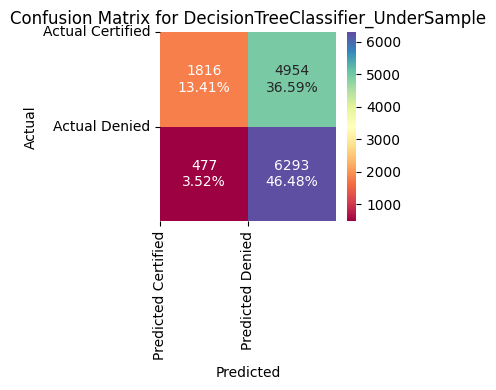

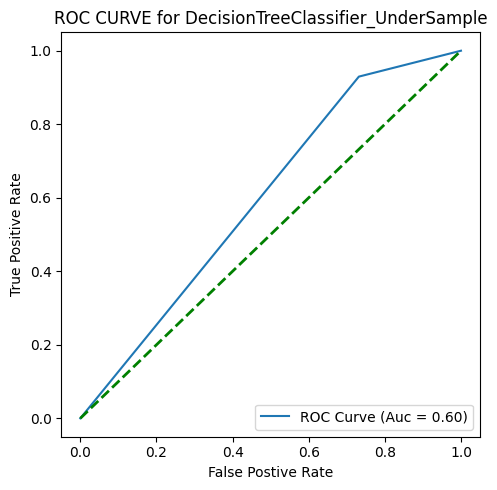

----------------------------------------------------------------------------------------------------
Accuracy 0.6938775510204082 
 Precision 0.7989623865110247 
 Recall 0.7238542890716804 
 F1_Score 0.7595561035758323
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.53      0.63      0.58      1692
           1       0.80      0.72      0.76      3404

    accuracy                           0.69      5096
   macro avg       0.67      0.68      0.67      5096
weighted avg       0.71      0.69      0.70      5096

----------------------------------------------------------------------------------------------------


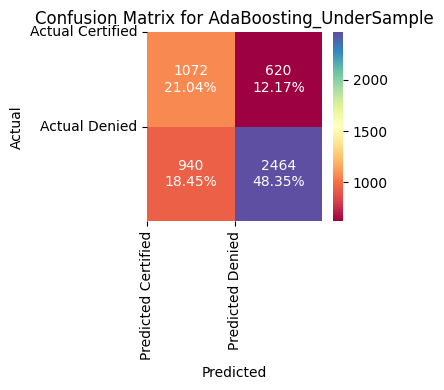

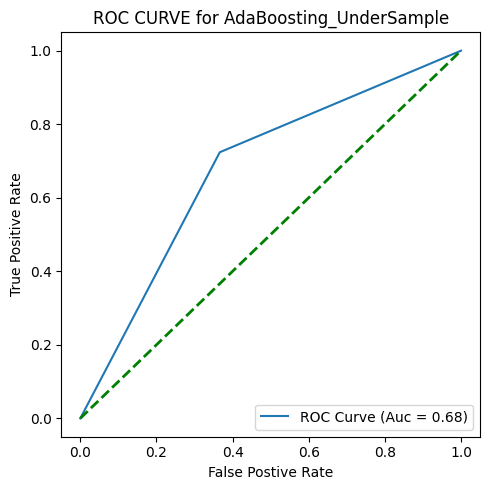

----------------------------------------------------------------------------------------------------
Accuracy 0.7021418020679469 
 Precision 0.6895166874394129 
 Recall 0.735450516986706 
 F1_Score 0.7117432635265528
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.67      0.69      6770
           1       0.69      0.74      0.71      6770

    accuracy                           0.70     13540
   macro avg       0.70      0.70      0.70     13540
weighted avg       0.70      0.70      0.70     13540

----------------------------------------------------------------------------------------------------


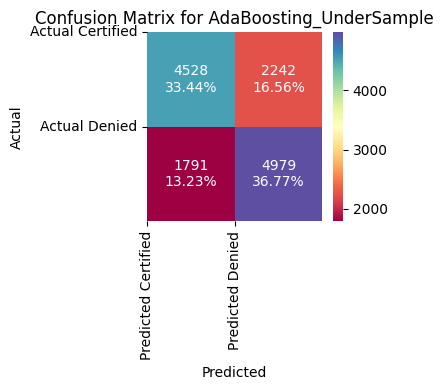

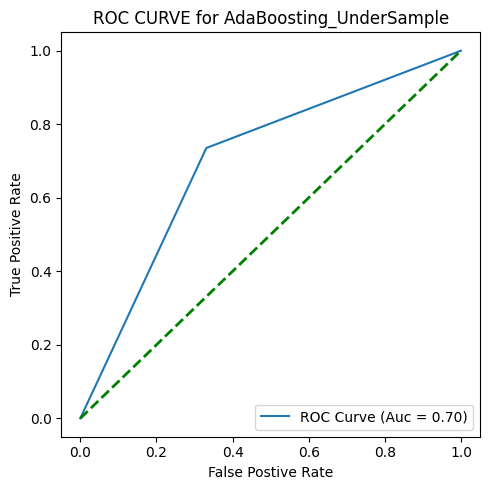

----------------------------------------------------------------------------------------------------
Accuracy 0.70074568288854 
 Precision 0.8103733069045259 
 Recall 0.7206227967097533 
 F1_Score 0.762867361219095
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.54      0.66      0.59      1692
           1       0.81      0.72      0.76      3404

    accuracy                           0.70      5096
   macro avg       0.68      0.69      0.68      5096
weighted avg       0.72      0.70      0.71      5096

----------------------------------------------------------------------------------------------------


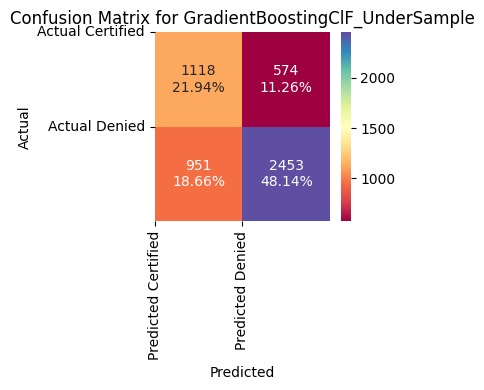

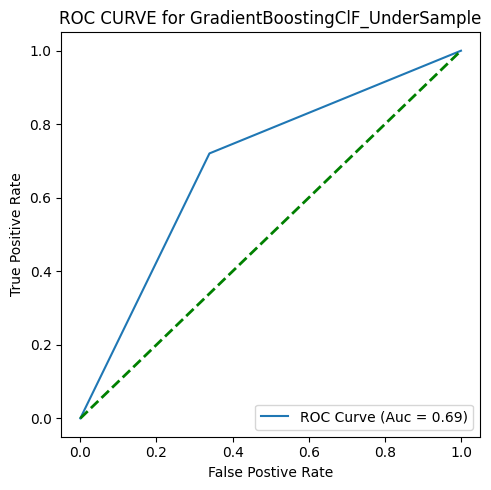

----------------------------------------------------------------------------------------------------
Accuracy 0.719645494830133 
 Precision 0.7118233618233618 
 Recall 0.738109305760709 
 F1_Score 0.7247280638143583
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.73      0.70      0.71      6770
           1       0.71      0.74      0.72      6770

    accuracy                           0.72     13540
   macro avg       0.72      0.72      0.72     13540
weighted avg       0.72      0.72      0.72     13540

----------------------------------------------------------------------------------------------------


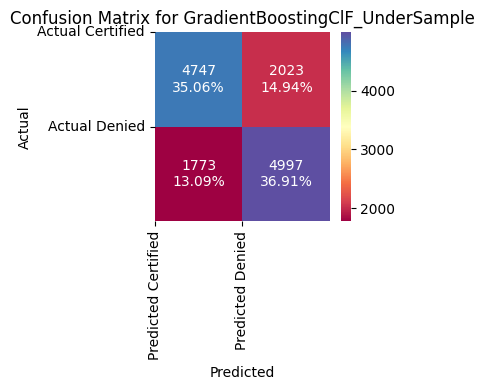

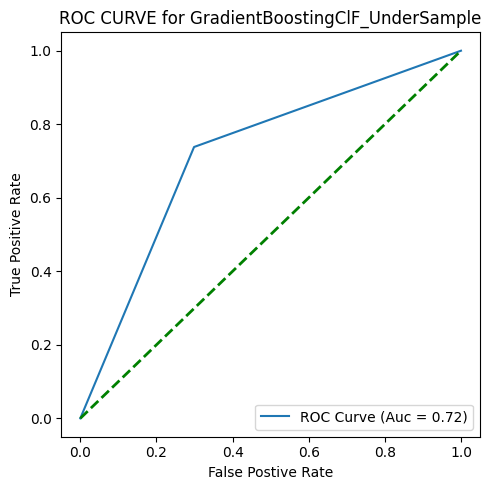

In [94]:
df_Test_busmpl,df_Train_busmpl = ObjBoosting.ModelExecution(dict_Transformed_dataset['Feature_Train_UnderSample'],dict_Transformed_dataset['Feature_Test_Scaled'],
                                                dict_Transformed_dataset['Target_Train_UnderSample'],dict_Transformed_dataset['Target_Test'],'UnderSample')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_busmpl], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_busmpl], axis = 0, ignore_index = True)

In [95]:
df_Test_busmpl

Type DatasetType  Accuracy  Precision  \
0  DecisionTreeClassifier_UnderSample        Test  0.709184   0.717126   
1             AdaBoosting_UnderSample        Test  0.693878   0.798962   
2     GradientBoostingClF_UnderSample        Test  0.700746   0.810373   

     Recall  F1-Score   ROC_AUC  
0  0.932432  0.810728  0.596240  
1  0.723854  0.759556  0.678712  
2  0.720623  0.762867  0.690690

In [96]:
df_Train_busmpl

Type DatasetType  Accuracy  Precision  \
0  DecisionTreeClassifier_UnderSample       Train  0.598892   0.559527   
1             AdaBoosting_UnderSample       Train  0.702142   0.689517   
2     GradientBoostingClF_UnderSample       Train  0.719645   0.711823   

     Recall  F1-Score   ROC_AUC  
0  0.929542  0.698562  0.598892  
1  0.735451  0.711743  0.702142  
2  0.738109  0.724728  0.719645

Observaation:
* No Overfiting observed in the Train and Test Dataset
* BOth the Ada and Grad Boosting have equilvanet Recall value of 0.72 which is good in predicting the positive cases

## HYPERTUING BOOSTING -ORIGINAL DATASET ADABOOSTING & GRADIENT BOOSTING

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----------------------------------------------------------------------------------------------------
AdaBoost-HyperTune
Model estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.30348817471803813, n_estimators=112,
                   random_state=42)
Model Parameter: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2, random_state=42), 'learning_rate': 0.30348817471803813, 'n_estimators': 112, 'random_state': 42}
----------------------------------------------------------------------------------------------------
Accuracy 0.7395996860282574 
 Precision 0.7699506108656096 
 Recall 0.8701527614571093 
 F1_Score 0.8169907598951869
----------------------------------------------------------------------------------------------------
Classification 

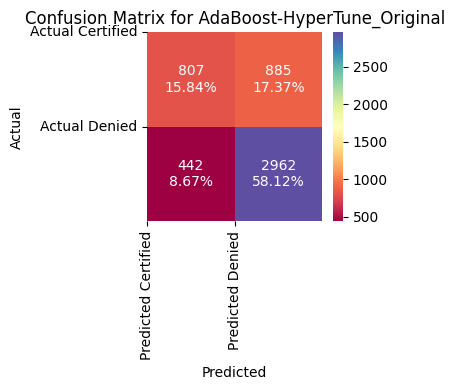

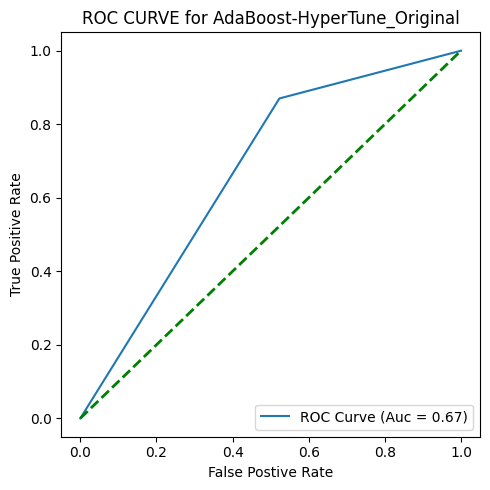

----------------------------------------------------------------------------------------------------
Accuracy 0.7491169544740973 
 Precision 0.7779230970442061 
 Recall 0.8738063757896283 
 F1_Score 0.8230817131391407
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.66      0.50      0.57      6770
           1       0.78      0.87      0.82     13614

    accuracy                           0.75     20384
   macro avg       0.72      0.69      0.70     20384
weighted avg       0.74      0.75      0.74     20384

----------------------------------------------------------------------------------------------------


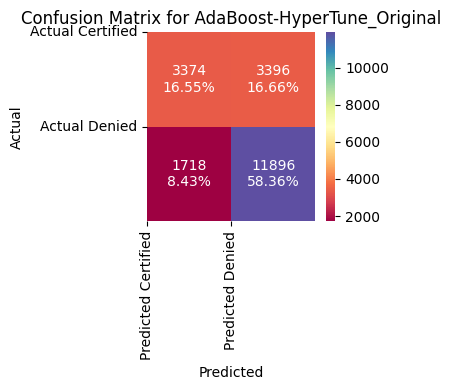

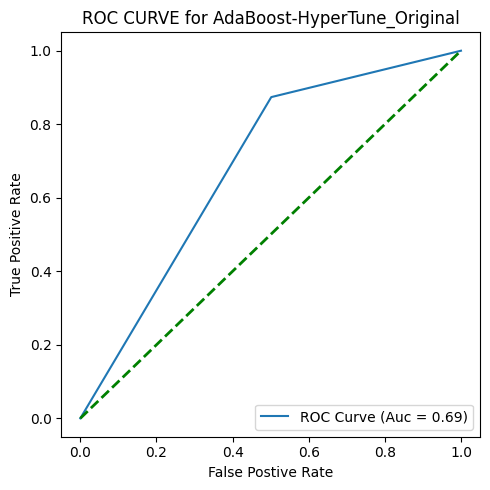

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----------------------------------------------------------------------------------------------------
GradBoost-HyperTune
Model estimator: GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.17080805141749866, max_depth=4,
                           max_features='log2', min_samples_leaf=6,
                           min_samples_split=4, n_estimators=117,
                           random_state=42, subsample=0.9372490874968)
Model Parameter: {'criterion': 'squared_error', 'learning_rate': 0.17080805141749866, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 117, 'random_state': 42, 'subsample': 0.9372490874968}
----------------------------------------------------------------------------------------------------
Accuracy 0.7370486656200942 
 Precision 0.7712933753943217 
 Recall 0.8619271445358402 
 F1_Score 0.8140954495005549
----

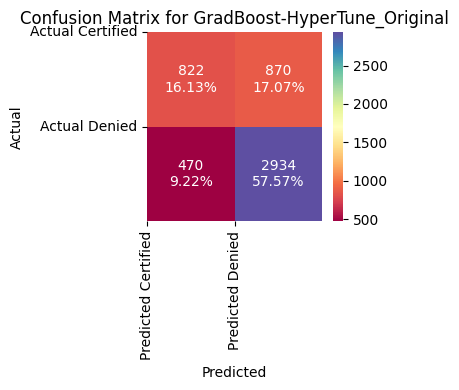

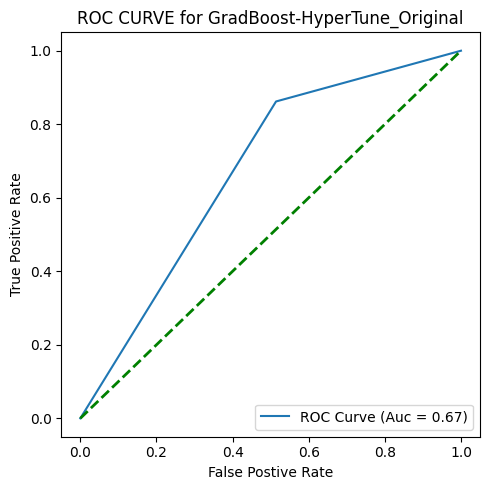

----------------------------------------------------------------------------------------------------
Accuracy 0.7658457613814756 
 Precision 0.791994187198626 
 Recall 0.8807110327603938 
 F1_Score 0.8339999304420408
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.69      0.53      0.60      6770
           1       0.79      0.88      0.83     13614

    accuracy                           0.77     20384
   macro avg       0.74      0.71      0.72     20384
weighted avg       0.76      0.77      0.76     20384

----------------------------------------------------------------------------------------------------


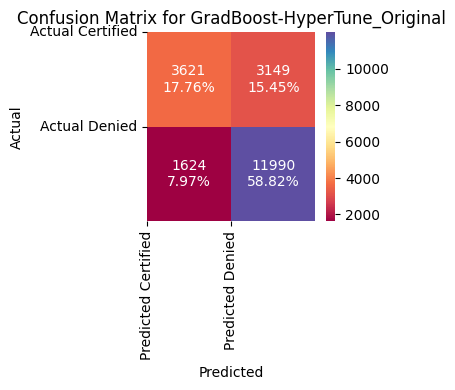

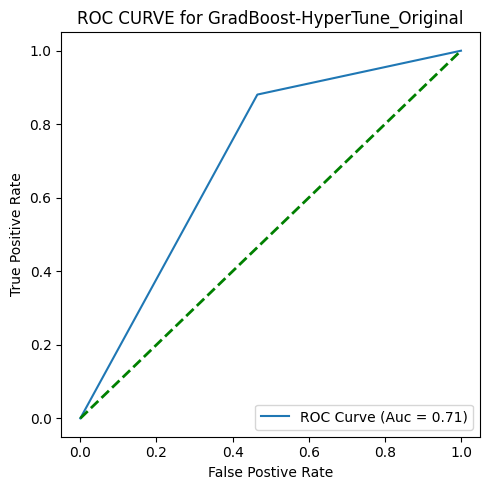

In [97]:
result_model,df_Test_hyOG, df_Train_hyOG = ObjBoosting.RandomSearchCV_HyperTune(dict_Transformed_dataset['Feature_Train'],dict_Transformed_dataset['Feature_Test'],
                                                 dict_Transformed_dataset['Target_Train'],dict_Transformed_dataset['Target_Test'],'Original')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_hyOG], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_hyOG], axis = 0, ignore_index = True)

In [98]:
result_model

{'AdaBoost-HyperTune_Best Estimator': AdaBoostClassifier(algorithm='SAMME',
                    estimator=DecisionTreeClassifier(max_depth=2,
                                                     random_state=42),
                    learning_rate=0.30348817471803813, n_estimators=112,
                    random_state=42),
 'AdaBoost-HyperTune_Best Parameter': {'algorithm': 'SAMME',
  'estimator': DecisionTreeClassifier(max_depth=2, random_state=42),
  'learning_rate': 0.30348817471803813,
  'n_estimators': 112,
  'random_state': 42},
 'AdaBoost-HyperTune_Best Score': 0.7461243523173898,
 'GradBoost-HyperTune_Best Estimator': GradientBoostingClassifier(criterion='squared_error',
                            learning_rate=0.17080805141749866, max_depth=4,
                            max_features='log2', min_samples_leaf=6,
                            min_samples_split=4, n_estimators=117,
                            random_state=42, subsample=0.9372490874968),
 'GradBoost-HyperTune_Best P

In [99]:
df_Test_hyOG

Type DatasetType  Accuracy  Precision    Recall  \
0   AdaBoost-HyperTune_Original        Test  0.739600   0.769951  0.870153   
1  GradBoost-HyperTune_Original        Test  0.737049   0.771293  0.861927   

   F1-Score   ROC_AUC  
0  0.816991  0.673552  
1  0.814095  0.673871

In [100]:
df_Train_hyOG

Type DatasetType  Accuracy  Precision    Recall  \
0   AdaBoost-HyperTune_Original       Train  0.749117   0.777923  0.873806   
1  GradBoost-HyperTune_Original       Train  0.765846   0.791994  0.880711   

   F1-Score   ROC_AUC  
0  0.823082  0.686091  
1  0.834000  0.707785

## HYPERTUING BOOSTING -SMOTE DATASET ADABOOSTING & GRADIENT BOOSTING

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----------------------------------------------------------------------------------------------------
AdaBoost-HyperTune
Model estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.1528668179219408, n_estimators=180,
                   random_state=42)
Model Parameter: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2, random_state=42), 'learning_rate': 0.1528668179219408, 'n_estimators': 180, 'random_state': 42}
----------------------------------------------------------------------------------------------------
Accuracy 0.6972135007849294 
 Precision 0.8082146406094733 
 Recall 0.7168037602820212 
 F1_Score 0.7597695780787794
----------------------------------------------------------------------------------------------------
Classification Re

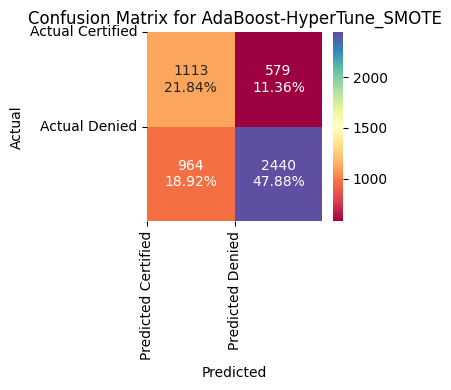

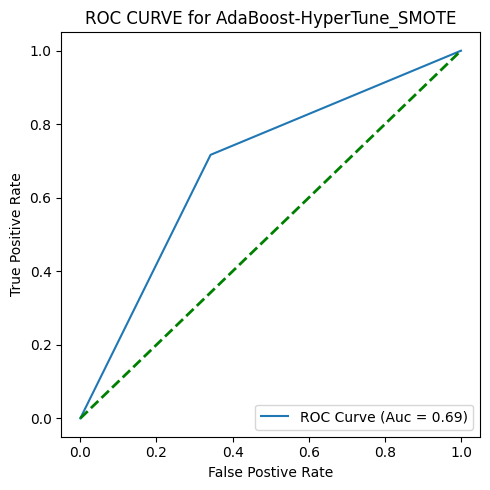

----------------------------------------------------------------------------------------------------
Accuracy 0.7171661524900838 
 Precision 0.7125602128118484 
 Recall 0.7280005876303804 
 F1_Score 0.7201976528721433
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.71      0.71     13614
           1       0.71      0.73      0.72     13614

    accuracy                           0.72     27228
   macro avg       0.72      0.72      0.72     27228
weighted avg       0.72      0.72      0.72     27228

----------------------------------------------------------------------------------------------------


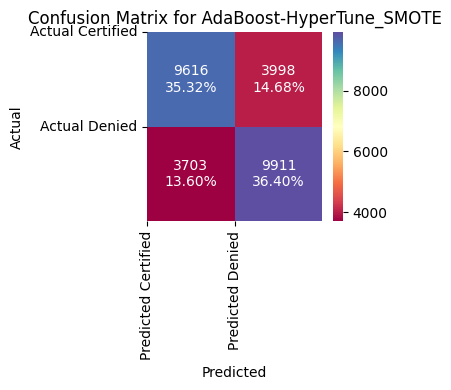

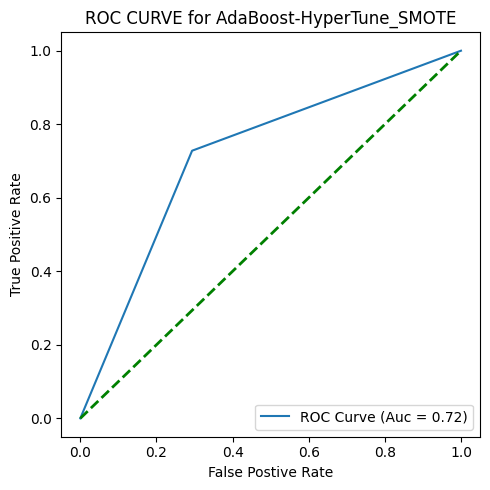

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----------------------------------------------------------------------------------------------------
GradBoost-HyperTune
Model estimator: GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.3044488920695857,
                           min_samples_split=9, n_estimators=116,
                           random_state=42, subsample=0.8694927466860924)
Model Parameter: {'criterion': 'squared_error', 'learning_rate': 0.3044488920695857, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 116, 'random_state': 42, 'subsample': 0.8694927466860924}
----------------------------------------------------------------------------------------------------
Accuracy 0.7142857142857143 
 Precision 0.7895362663495838 
 Recall 0.7802585193889542 
 F1_Score 0.7848699763593381
-----------------------------------------------------------------------------------

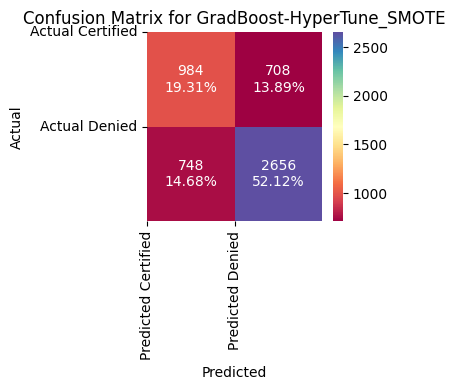

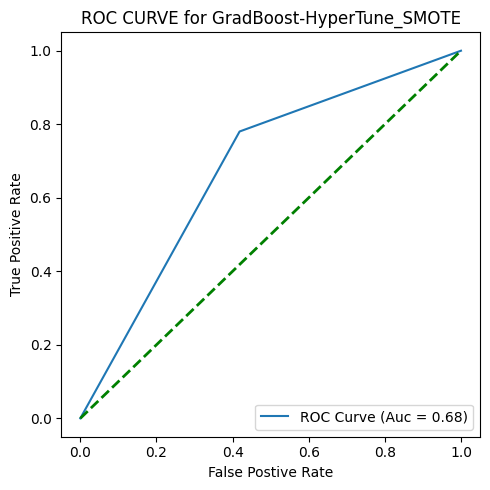

----------------------------------------------------------------------------------------------------
Accuracy 0.784413104157485 
 Precision 0.7741044881778281 
 Recall 0.8032172763331864 
 F1_Score 0.7883922134102379
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.80      0.77      0.78     13614
           1       0.77      0.80      0.79     13614

    accuracy                           0.78     27228
   macro avg       0.78      0.78      0.78     27228
weighted avg       0.78      0.78      0.78     27228

----------------------------------------------------------------------------------------------------


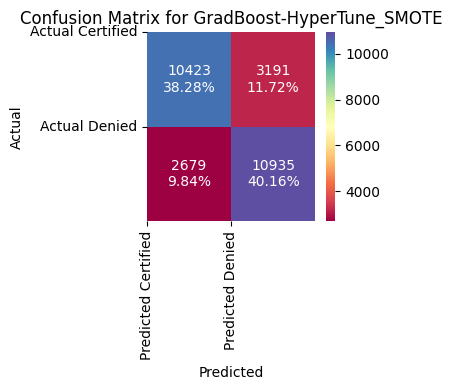

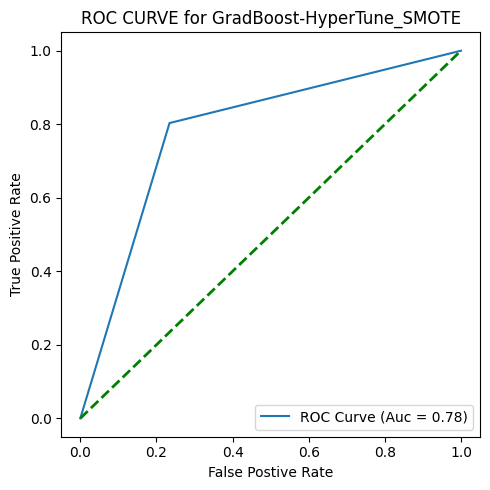

In [101]:
result_model,df_Test_hySmote, df_Train_hySmote = ObjBoosting.RandomSearchCV_HyperTune(dict_Transformed_dataset['Feature_Train_Resample'],dict_Transformed_dataset['Feature_Test_Scaled'],
                                                 dict_Transformed_dataset['Target_Train_Resample'],dict_Transformed_dataset['Target_Test'],'SMOTE')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_hySmote], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_hySmote], axis = 0, ignore_index = True)

In [102]:
result_model

{'AdaBoost-HyperTune_Best Estimator': AdaBoostClassifier(algorithm='SAMME',
                    estimator=DecisionTreeClassifier(max_depth=2,
                                                     random_state=42),
                    learning_rate=0.1528668179219408, n_estimators=180,
                    random_state=42),
 'AdaBoost-HyperTune_Best Parameter': {'algorithm': 'SAMME',
  'estimator': DecisionTreeClassifier(max_depth=2, random_state=42),
  'learning_rate': 0.1528668179219408,
  'n_estimators': 180,
  'random_state': 42},
 'AdaBoost-HyperTune_Best Score': 0.7136403702071398,
 'GradBoost-HyperTune_Best Estimator': GradientBoostingClassifier(criterion='squared_error',
                            learning_rate=0.3044488920695857,
                            min_samples_split=9, n_estimators=116,
                            random_state=42, subsample=0.8694927466860924),
 'GradBoost-HyperTune_Best Parameter': {'criterion': 'squared_error',
  'learning_rate': 0.3044488920695857,
 

In [103]:
df_Test_hySmote

Type DatasetType  Accuracy  Precision    Recall  \
0   AdaBoost-HyperTune_SMOTE        Test  0.697214   0.808215  0.716804   
1  GradBoost-HyperTune_SMOTE        Test  0.714286   0.789536  0.780259   

   F1-Score   ROC_AUC  
0   0.75977  0.687303  
1   0.78487  0.680909

In [104]:
df_Train_hySmote

Type DatasetType  Accuracy  Precision    Recall  \
0   AdaBoost-HyperTune_SMOTE       Train  0.717166   0.712560  0.728001   
1  GradBoost-HyperTune_SMOTE       Train  0.784413   0.774104  0.803217   

   F1-Score   ROC_AUC  
0  0.720198  0.717166  
1  0.788392  0.784413

## HYPERTUING BOOSTING - UNDERSAMPLE DATASET ADABOOSTING & GRADIENT BOOSTING

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----------------------------------------------------------------------------------------------------
AdaBoost-HyperTune
Model estimator: AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.3365407688058354, n_estimators=89,
                   random_state=42)
Model Parameter: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2, random_state=42), 'learning_rate': 0.3365407688058354, 'n_estimators': 89, 'random_state': 42}
----------------------------------------------------------------------------------------------------
Accuracy 0.6927001569858713 
 Precision 0.8121603260869565 
 Recall 0.7024089306698003 
 F1_Score 0.7533081285444234
----------------------------------------------------------------------------------------------------
Classification Repo

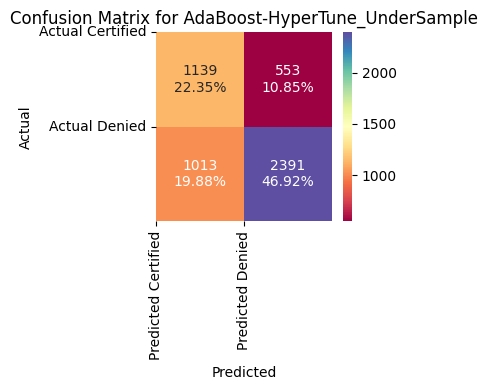

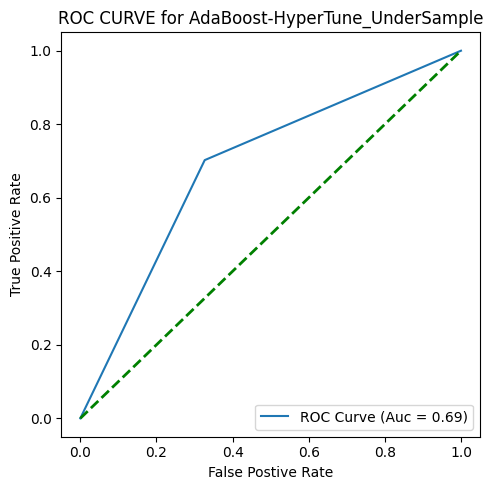

----------------------------------------------------------------------------------------------------
Accuracy 0.7090841949778435 
 Precision 0.7061307703509538 
 Recall 0.7162481536189069 
 F1_Score 0.7111534795042898
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.71      0.70      0.71      6770
           1       0.71      0.72      0.71      6770

    accuracy                           0.71     13540
   macro avg       0.71      0.71      0.71     13540
weighted avg       0.71      0.71      0.71     13540

----------------------------------------------------------------------------------------------------


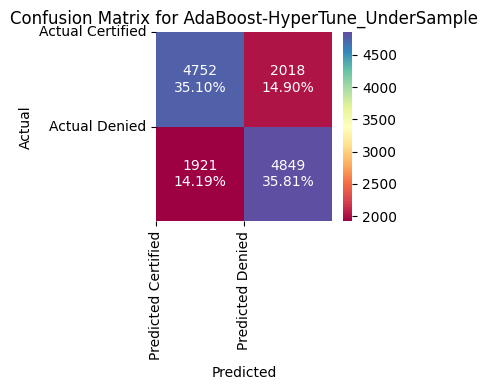

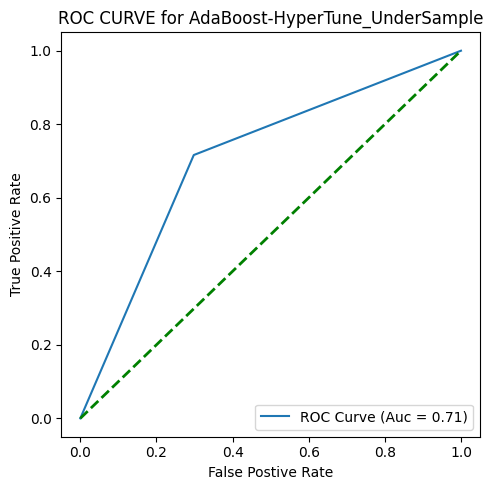

Fitting 3 folds for each of 50 candidates, totalling 150 fits
----------------------------------------------------------------------------------------------------
GradBoost-HyperTune
Model estimator: GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.17080805141749866, max_depth=4,
                           max_features='log2', min_samples_leaf=6,
                           min_samples_split=4, n_estimators=117,
                           random_state=42, subsample=0.9372490874968)
Model Parameter: {'criterion': 'squared_error', 'learning_rate': 0.17080805141749866, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 117, 'random_state': 42, 'subsample': 0.9372490874968}
----------------------------------------------------------------------------------------------------
Accuracy 0.7031004709576139 
 Precision 0.8163265306122449 
 Recall 0.7168037602820212 
 F1_Score 0.7633348975441889
----

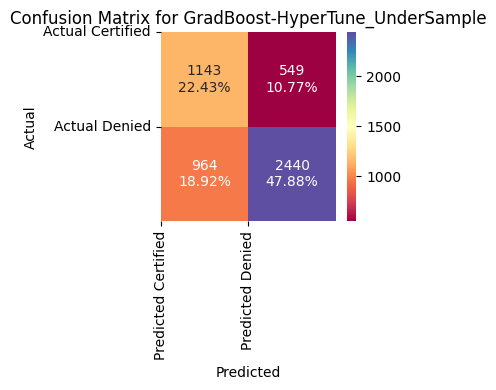

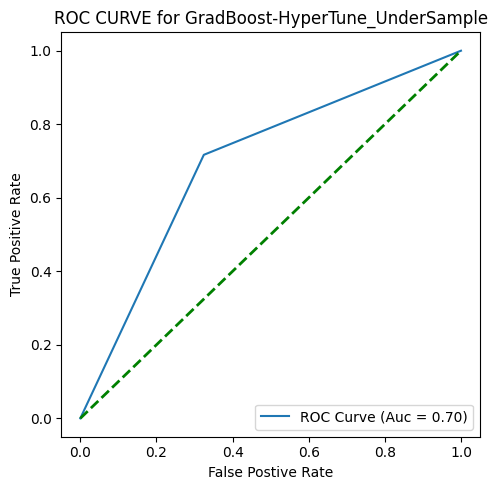

----------------------------------------------------------------------------------------------------
Accuracy 0.7363367799113737 
 Precision 0.7291606989401318 
 Recall 0.7519940915805022 
 F1_Score 0.7404013961605584
----------------------------------------------------------------------------------------------------
Classification Report:                precision    recall  f1-score   support

           0       0.74      0.72      0.73      6770
           1       0.73      0.75      0.74      6770

    accuracy                           0.74     13540
   macro avg       0.74      0.74      0.74     13540
weighted avg       0.74      0.74      0.74     13540

----------------------------------------------------------------------------------------------------


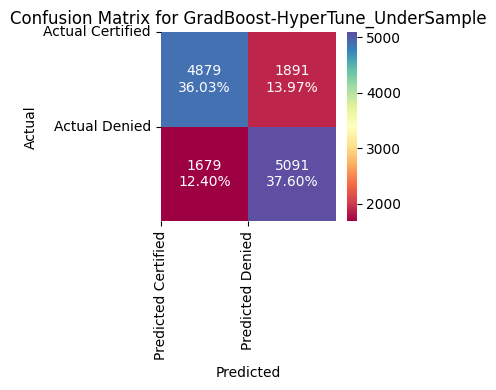

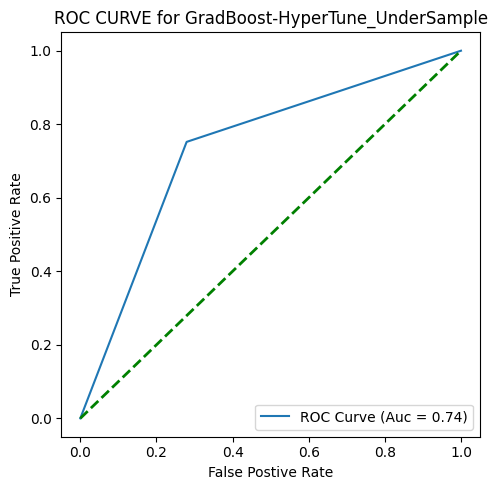

In [105]:
result_model,df_Test_hyUsmp,df_Train_hyUsmp = ObjBoosting.RandomSearchCV_HyperTune(dict_Transformed_dataset['Feature_Train_UnderSample'],dict_Transformed_dataset['Feature_Test_Scaled'],
                                                dict_Transformed_dataset['Target_Train_UnderSample'],dict_Transformed_dataset['Target_Test'],'UnderSample')

overall_Train_Metrics=pd.concat([overall_Train_Metrics, df_Train_hyUsmp], axis=0, ignore_index = True)
overall_Test_Metrics = pd.concat([overall_Test_Metrics, df_Test_hyUsmp], axis = 0, ignore_index = True)

In [106]:
result_model

{'AdaBoost-HyperTune_Best Estimator': AdaBoostClassifier(algorithm='SAMME',
                    estimator=DecisionTreeClassifier(max_depth=2,
                                                     random_state=42),
                    learning_rate=0.3365407688058354, n_estimators=89,
                    random_state=42),
 'AdaBoost-HyperTune_Best Parameter': {'algorithm': 'SAMME',
  'estimator': DecisionTreeClassifier(max_depth=2, random_state=42),
  'learning_rate': 0.3365407688058354,
  'n_estimators': 89,
  'random_state': 42},
 'AdaBoost-HyperTune_Best Score': 0.7101910550799553,
 'GradBoost-HyperTune_Best Estimator': GradientBoostingClassifier(criterion='squared_error',
                            learning_rate=0.17080805141749866, max_depth=4,
                            max_features='log2', min_samples_leaf=6,
                            min_samples_split=4, n_estimators=117,
                            random_state=42, subsample=0.9372490874968),
 'GradBoost-HyperTune_Best Param

In [107]:
df_Test_hyUsmp

Type DatasetType  Accuracy  Precision    Recall  \
0   AdaBoost-HyperTune_UnderSample        Test    0.6927   0.812160  0.702409   
1  GradBoost-HyperTune_UnderSample        Test    0.7031   0.816327  0.716804   

   F1-Score   ROC_AUC  
0  0.753308  0.687788  
1  0.763335  0.696168

In [108]:
df_Train_hyUsmp

Type DatasetType  Accuracy  Precision    Recall  \
0   AdaBoost-HyperTune_UnderSample       Train  0.709084   0.706131  0.716248   
1  GradBoost-HyperTune_UnderSample       Train  0.736337   0.729161  0.751994   

   F1-Score   ROC_AUC  
0  0.711153  0.709084  
1  0.740401  0.736337

# OVERALL METRICS

In [109]:
overall_Test_Metrics.sort_values(by='Recall',ascending=False).reset_index(drop=True)

Type DatasetType  Accuracy  Precision  \
0     DecisionTreeClassifier_UnderSample        Test  0.709184   0.717126   
1        DecisionTreeClassifier_Original        Test  0.709184   0.717126   
2           DecisionTreeClassifier_SMOTE        Test  0.709184   0.717126   
3                   AdaBoosting_Original        Test  0.731554   0.755907   
4                 RF-RdmnsrchCV_Original        Test  0.739600   0.763914   
5            AdaBoost-HyperTune_Original        Test  0.739600   0.769951   
6           GradientBoostingClF_Original        Test  0.739796   0.772560   
7           GradBoost-HyperTune_Original        Test  0.737049   0.771293   
8                  Bg-RdmsrchCV_Original        Test  0.739796   0.776183   
9               DTree-RdmsrchCV_Original        Test  0.731358   0.773890   
10       RandomForestClassifier_Original        Test  0.721350   0.767241   
11           Bagging Classifier_Original        Test  0.716641   0.765295   
12             GradBoost-HyperTune_SMOTE        Test  0.714286   0.789536   
13                   RF-RdmnsrchCV_SMOTE        Test  0.711146   0.798701   
14          RandomForestClassifier_SMOTE        Test  0.698195   0.786900   
15                    Bg-RdmsrchCV_SMOTE        Test  0.694270   0.783129   
16                 DTree-RdmsrchCV_SMOTE        Test  0.699765   0.791537   
17              Bagging Classifier_SMOTE        Test  0.692896   0.783884   
18             GradientBoostingClF_SMOTE        Test  0.708791   0.806122   
19           DTree-RdmsrchCV_UnderSample        Test  0.706044   0.805645   
20     Decision Tree Classifier_Original        Test  0.652669   0.741859   
21              Bg-RdmsrchCV_UnderSample        Test  0.704867   0.807443   
22                     AdaBoosting_SMOTE        Test  0.692896   0.797092   
23               AdaBoosting_UnderSample        Test  0.693878   0.798962   
24       GradientBoostingClF_UnderSample        Test  0.700746   0.810373   
25             RF-RdmnsrchCV_UnderSample        Test  0.704278   0.817968   
26              AdaBoost-HyperTune_SMOTE        Test  0.697214   0.808215   
27       GradBoost-HyperTune_UnderSample        Test  0.703100   0.816327   
28        AdaBoost-HyperTune_UnderSample        Test  0.692700   0.812160   
29        Decision Tree Classifier_SMOTE        Test  0.646193   0.753083   
30    RandomForestClassifier_UnderSample        Test  0.677590   0.814352   
31        Bagging Classifier_UnderSample        Test  0.676217   0.815241   
32  Decision Tree Classifier_UnderSample        Test  0.614011   0.764836   

      Recall  F1-Score   ROC_AUC  
0   0.932432  0.810728  0.596240  
1   0.932432  0.810728  0.596240  
2   0.932432  0.810728  0.596240  
3   0.883373  0.814684  0.654748  
4   0.883079  0.819185  0.667012  
5   0.870153  0.816991  0.673552  
6   0.865159  0.816242  0.676374  
7   0.861927  0.814095  0.673871  
8   0.857814  0.814960  0.680089  
9   0.844595  0.807698  0.674070  
10  0.836663  0.800450  0.663012  
11  0.830494  0.796562  0.659041  
12  0.780259  0.784870  0.680909  
13  0.758813  0.778246  0.687031  
14  0.751763  0.768930  0.671094  
15  0.750000  0.766206  0.666076  
16  0.747356  0.768812  0.675687  
17  0.745887  0.764414  0.666088  
18  0.742656  0.773089  0.691659  
19  0.737955  0.770316  0.689900  
20  0.736193  0.739015  0.610413  
21  0.732961  0.768402  0.690653  
22  0.724736  0.759194  0.676789  
23  0.723854  0.759556  0.678712  
24  0.720623  0.762867  0.690690  
25  0.716804  0.764052  0.697941  
26  0.716804  0.759770  0.687303  
27  0.716804  0.763335  0.696168  
28  0.702409  0.753308  0.687788  
29  0.699765  0.725445  0.619091  
30  0.670094  0.735214  0.681383  
31  0.666275  0.733269  0.681246  
32  0.609577  0.678437  0.616254

In [110]:
overall_Train_Metrics.sort_values(by='Recall',ascending=False).reset_index(drop=True)

Type DatasetType  Accuracy  Precision  \
0      Decision Tree Classifier_Original       Train  1.000000   1.000000   
1                     Bg-RdmsrchCV_SMOTE       Train  1.000000   1.000000   
2            Bagging Classifier_Original       Train  1.000000   1.000000   
3         Decision Tree Classifier_SMOTE       Train  1.000000   1.000000   
4           RandomForestClassifier_SMOTE       Train  1.000000   1.000000   
5               Bagging Classifier_SMOTE       Train  1.000000   1.000000   
6   Decision Tree Classifier_UnderSample       Train  1.000000   1.000000   
7     RandomForestClassifier_UnderSample       Train  1.000000   1.000000   
8         Bagging Classifier_UnderSample       Train  1.000000   1.000000   
9        RandomForestClassifier_Original       Train  0.999951   0.999927   
10       DecisionTreeClassifier_Original       Train  0.711146   0.719065   
11          DecisionTreeClassifier_SMOTE       Train  0.600448   0.560442   
12    DecisionTreeClassifier_UnderSample       Train  0.598892   0.559527   
13                   RF-RdmnsrchCV_SMOTE       Train  0.926399   0.940641   
14                RF-RdmnsrchCV_Original       Train  0.764521   0.782681   
15                  AdaBoosting_Original       Train  0.738324   0.761364   
16          GradBoost-HyperTune_Original       Train  0.765846   0.791994   
17                 Bg-RdmsrchCV_Original       Train  0.770604   0.798690   
18           AdaBoost-HyperTune_Original       Train  0.749117   0.777923   
19          GradientBoostingClF_Original       Train  0.754661   0.785331   
20              DTree-RdmsrchCV_Original       Train  0.743622   0.784725   
21             GradBoost-HyperTune_SMOTE       Train  0.784413   0.774104   
22              Bg-RdmsrchCV_UnderSample       Train  0.752511   0.738125   
23             RF-RdmnsrchCV_UnderSample       Train  0.772600   0.768436   
24                 DTree-RdmsrchCV_SMOTE       Train  0.734061   0.716931   
25             GradientBoostingClF_SMOTE       Train  0.743463   0.738402   
26       GradBoost-HyperTune_UnderSample       Train  0.736337   0.729161   
27           DTree-RdmsrchCV_UnderSample       Train  0.709601   0.693905   
28                     AdaBoosting_SMOTE       Train  0.703504   0.688997   
29       GradientBoostingClF_UnderSample       Train  0.719645   0.711823   
30               AdaBoosting_UnderSample       Train  0.702142   0.689517   
31              AdaBoost-HyperTune_SMOTE       Train  0.717166   0.712560   
32        AdaBoost-HyperTune_UnderSample       Train  0.709084   0.706131   

      Recall  F1-Score   ROC_AUC  
0   1.000000  1.000000  1.000000  
1   1.000000  1.000000  1.000000  
2   1.000000  1.000000  1.000000  
3   1.000000  1.000000  1.000000  
4   1.000000  1.000000  1.000000  
5   1.000000  1.000000  1.000000  
6   1.000000  1.000000  1.000000  
7   1.000000  1.000000  1.000000  
8   1.000000  1.000000  1.000000  
9   1.000000  0.999963  0.999926  
10  0.931394  0.811572  0.599818  
11  0.931394  0.699799  0.600448  
12  0.929542  0.698562  0.598892  
13  0.910239  0.925190  0.926399  
14  0.896283  0.835639  0.697920  
15  0.885853  0.818904  0.663754  
16  0.880711  0.834000  0.707785  
17  0.877773  0.836366  0.716434  
18  0.873806  0.823082  0.686091  
19  0.870648  0.825792  0.696033  
20  0.849052  0.815622  0.690331  
21  0.803217  0.788392  0.784413  
22  0.782718  0.759768  0.752511  
23  0.780355  0.774350  0.772600  
24  0.773542  0.744161  0.734061  
25  0.754077  0.746157  0.743463  
26  0.751994  0.740401  0.736337  
27  0.750074  0.720897  0.709601  
28  0.741883  0.714463  0.703504  
29  0.738109  0.724728  0.719645  
30  0.735451  0.711743  0.702142  
31  0.728001  0.720198  0.717166  
32  0.716248  0.711153  0.709084

# Recomendation/Observation

* Based on the Observation 85% Doctrate  amd 80% of Master qulafied employee has more chance to get VISA or job oppurtunites so encouraging the applicants to do the doctrate/master or pick the doctrate/master degree applicant
* More importance given to African and European applicants
* Can concentrate on Asian applicants as they are more in intrested to work in US as per the dataset received more applicants from Asian
* Experience employees has more prefence to get VISA

# Recomendation
* can encourage the employees to pursue Master/Doctrate
* Can leverage the Skill set of existing employee by providng additional training
* Expereiced employyes are more likely to get visa
* Providing resonable hike to retain the employee


## Model Observation

* Both the Bagging and Boosting hypertuned model shown low Bias and low variance

* AdaBoosting and Gradinet BOOsting hypertuned model given average 0.72 Recall value which shows good performace on predicting the Certified Visa applicants and ROC AUC also near to 68% which shows the model is genearlized to new data set

* Hypertuned Bagging model given the Recall average of 0.74 were this model can produce positive result to new data also the ROC AUC is 68% so it will be low variance to new dataset
